# **Drug Consumption Classification**

## **Dataset Information**
| Feature Name          | Description                                                                                                               |
|-----------------------|---------------------------------------------------------------------------------------------------------------------------|
| `Gender`               | Indicates the gender of the participant.                                                                                  |
| `Education`             | Indicates the level of education of participant.                                                                          |
| `Country`               | Indicates the country of current residence of the participant.                                                            |
| `Ethnicity`             | Indicates the ethnicity of the participant.                                                                               |
| `NScore`                | Indicates the level of Neuroticism. Individuals who score high on neuroticism are more likely than average to be moody and to experience such feelings as anxiety, worry, fear, anger, frustration, envy, jealousy, guilt, depressed mood, and loneliness.                        |
| `EScore`                | Indicates the level of Extraversion. A person who scores high in extraversion on a personality test is the life of the party. They enjoy being with people, participating in social gatherings, and are full of energy.                                                           |
| `OScore`                | Indicates the level of Openness to experience. A person with a high level of openness to experience in a personality test enjoys trying new things.      |
| `Ascore`                | Indicates the level of Agreeableness. A person with a high level of agreeableness in a personality test is usually warm, friendly, and tactful. They generally have an optimistic view of human nature and get along well with others.                                       |
| `Cscore`                | Indicates the level of Conscientiousness. A person scoring high in conscientiousness usually has a high level of self-discipline. These individuals prefer to follow a plan, rather than act spontaneously.                                                                           |
| `Impulsive`             | Indicates the level of impulsiveness.  If you describe someone as impulsive, you mean that they do things suddenly without thinking about them carefully first.                                                                                                                |
| `Sensation`             | Indicates the level of sensation seeking. Sensation is input about the physical world obtained by our sensory receptors, and perception is the process by which the brain selects, organizes, and interprets these sensations.                                                                                                                                         |            

## **Imports**

In [35]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier,
                              HistGradientBoostingClassifier,
                              RandomForestClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, mean_squared_error)
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [36]:
warnings.filterwarnings("ignore")

## **Data Preprocessing**

In this section, we will load the dataset and perform some basic data preprocessing steps, like checking for missing values and outliers, encoding categorical variables, and splitting the data into training and testing sets. Furthermore, we will perform some exploratory data analysis to understand the data better.
Also, we will perform feature scaling to scale the features to a similar range.

### **Loading the Dataset**

In [37]:
initial_dataset = pd.read_csv('data/drug_consumption.csv')

In [38]:
initial_dataset.head(10)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [39]:
initial_dataset.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


### **Checking for Missing Values**

As we can see below, there are no missing values in the dataset.

In [40]:
initial_dataset = initial_dataset.dropna()
initial_dataset.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

### **Checking for Outliers**

Our dataset contains a column with a ficticious drug name called `Semer`. This is used to detect outliers in the dataset. We will remove every row that does not contain the value `CL0` in the Semer column. After that, we will remove the Semer column from the dataset.

In [41]:
initial_dataset = initial_dataset[initial_dataset['Semer'] == 'CL0']
initial_dataset = initial_dataset.drop('Semer', axis=1)

### **Delete Meaningless Columns**

The `ID` column is meaningless and does not provide any useful information for our analysis. Therefore, we will remove it from the dataset.

In [42]:
initial_dataset = initial_dataset.drop('ID', axis=1)

In [43]:
replacer = {
    'CL0': 0,
    'CL1': 1,
    'CL2': 2,
    'CL3': 3,
    'CL4': 4,
    'CL5': 5,
    'CL6': 6,
}

dataset = initial_dataset.replace(replacer)


# create a dataset with only the drug columns
dataset[['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']].astype('category')

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0
1,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0
2,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0
3,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0
4,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,5,0,0,0,4,5,4,0,0,0,0,0,3,3,0,0,0,5
1881,5,0,0,0,5,3,4,0,0,2,0,0,3,5,4,4,5,0
1882,4,6,5,5,6,6,6,4,0,4,0,2,0,2,0,2,6,0
1883,5,0,0,0,6,6,5,0,0,3,0,0,3,3,0,3,4,0


In [44]:
initial_dataset.head(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0


<Axes: >

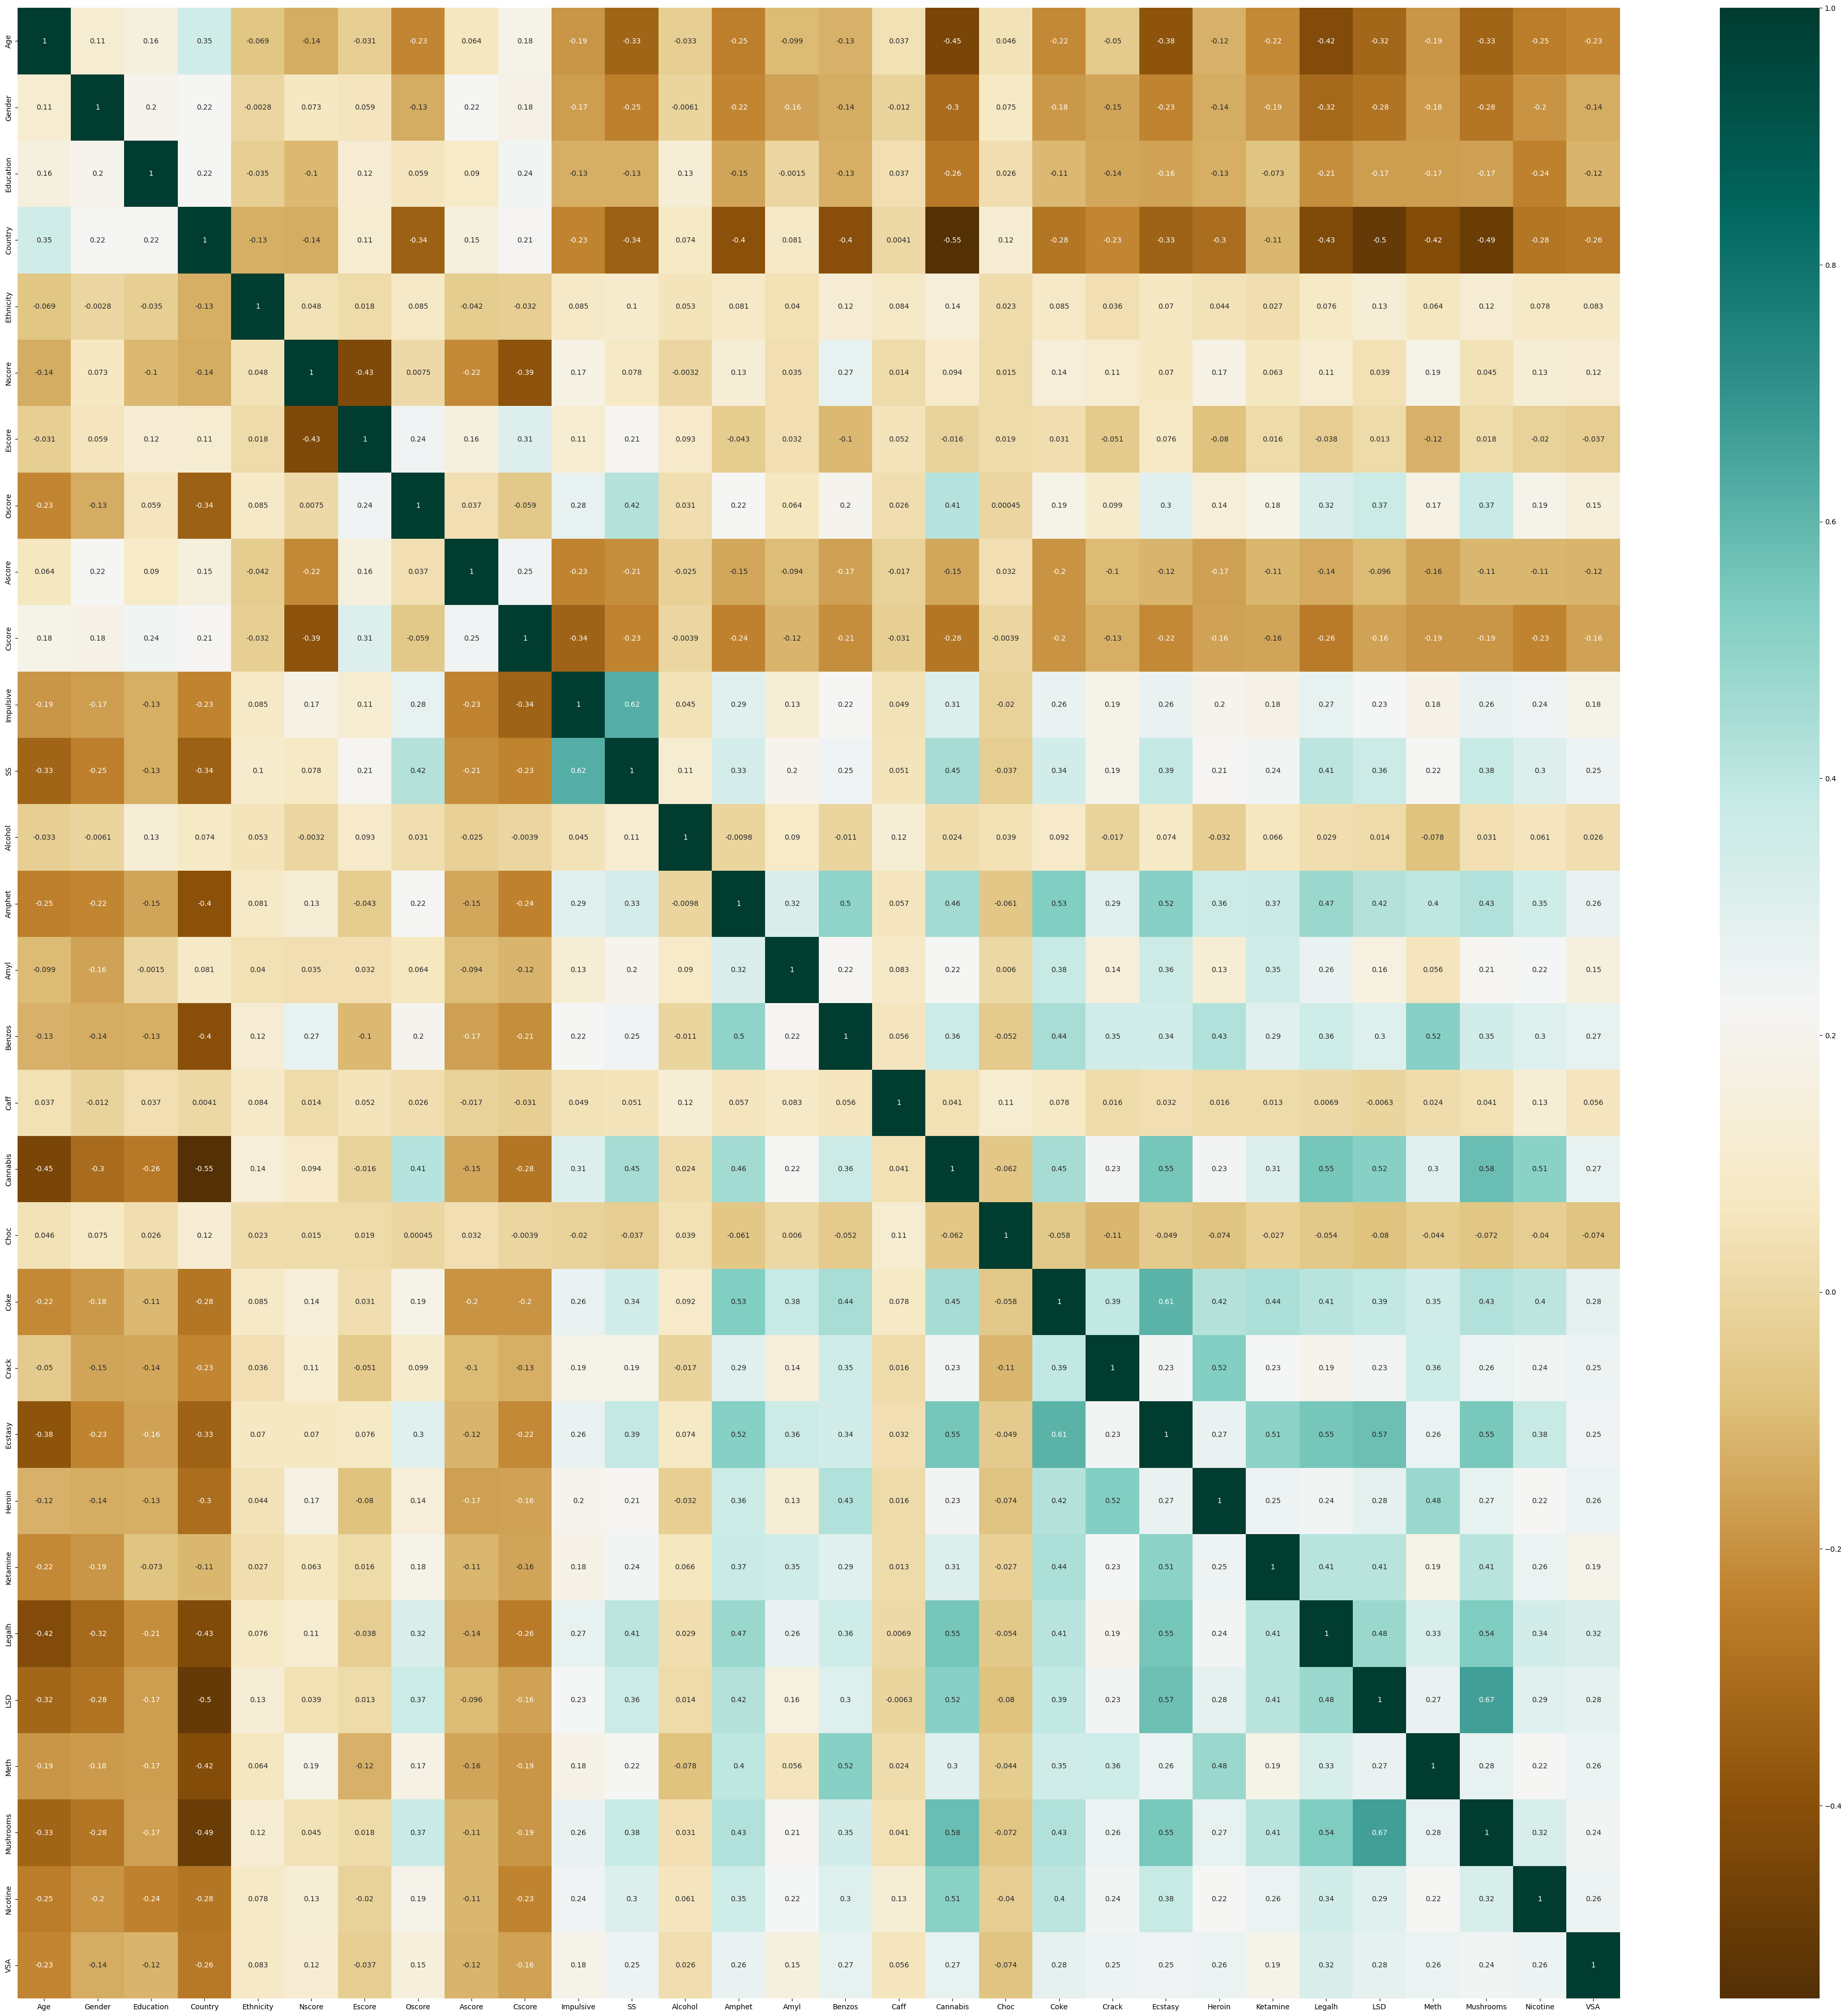

In [45]:
plt.figure(figsize=(50, 50))
sns.heatmap(dataset.corr(),annot = True, cmap = 'BrBG')

### **Replacing the float values with the actual values**

The dataset contains normalized values for the features. We will replace these normalized values with the actual values to make the data more interpretable and, also to perform our own normalization later.

In [46]:
age_col = {
    -0.95197: '18-24',
    -0.07854: '25 - 34',
    0.49788: '35 - 44',
    1.09449: '45 - 54',
    1.82213: '55 - 64',
    2.59171: '65+'
}
dataset['Age'] = dataset['Age'].replace(age_col)
dataset['Age'].astype('category')

gender_col = {
    0.48246: 'Female',
    -0.48246: 'Male'
}
dataset['Gender'] = dataset['Gender'].replace(gender_col)

education_col = {
    -2.43591: 'Left School Before 16 years',
    -1.73790: 'Left School at 16 years',
    -1.43719: 'Left School at 17 years',
    -1.22751: 'Left School at 18 years',
    -0.61113: 'Some College,No Certificate Or Degree',
    -0.05921: 'Professional Certificate/ Diploma',
    0.45468: 'University Degree',
    1.16365: 'Masters Degree',
    1.98437: 'Doctorate Degree',
}
dataset['Education'] = dataset['Education'].replace(education_col)
dataset['Education'].astype('category')

country_col = {
    -0.09765: 'Australia',
    0.24923: 'Canada',
    -0.46841: 'New Zealand',
    -0.28519: 'Other',
    0.21128: 'Republic of Ireland',
    0.96082: 'UK',
    -0.57009: 'USA'
}
dataset['Country'] = dataset['Country'].replace(country_col)
dataset['Country'].astype('category')

ethnicity_col = {
    -0.50212: 'Asian',
    -1.10702: 'Black',
    1.90725: 'Mixed-Black/Asian',
    0.12600: 'Mixed-White/Asian',
    -0.22166: 'Mixed-White/Black',
    0.11440: 'Other',
    -0.31685: 'White'
}

dataset['Ethnicity'] = dataset['Ethnicity'].replace(ethnicity_col)
dataset['Ethnicity'].astype('category')



0       Mixed-White/Asian
1                   White
2                   White
3                   White
4                   White
              ...        
1880                White
1881                White
1882                White
1883                White
1884                White
Name: Ethnicity, Length: 1877, dtype: category
Categories (7, object): ['Asian', 'Black', 'Mixed-Black/Asian', 'Mixed-White/Asian', 'Mixed-White/Black', 'Other', 'White']

In [47]:
dataset.head(10)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,35 - 44,Female,Professional Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,2,0
1,25 - 34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,4,0,2,0,2,3,0,4,0
2,35 - 44,Male,Professional Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,1,0,0
3,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,2,0,0,0,0,2,0
4,35 - 44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,1,0,0,1,0,0,2,2,0
5,65+,Female,Left School at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0,0,0,0,0,0,0,0,6,0
6,45 - 54,Male,Masters Degree,USA,White,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,...,0,0,0,0,0,0,0,0,6,0
7,35 - 44,Male,Left School at 16 years,UK,White,-1.32828,1.93886,-0.84732,-0.30172,1.63088,...,0,0,0,0,0,0,0,0,0,0
8,35 - 44,Female,Professional Certificate/ Diploma,Canada,White,0.62967,2.57309,-0.97631,0.76096,1.13407,...,0,0,0,0,0,0,0,0,6,0
9,55 - 64,Male,Masters Degree,UK,White,-0.24649,0.00332,-1.42424,0.59042,0.12331,...,0,0,0,0,0,0,0,0,6,0


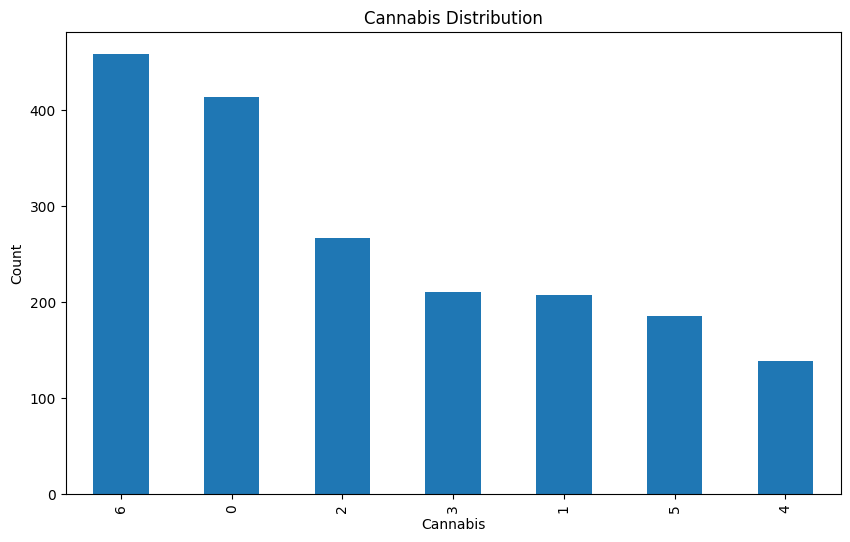

In [48]:
# draw bar plots that count the number of rows for each unique value in each column
for col in dataset.columns:
    if col in ['Cannabis']:
        plt.figure(figsize=(10, 6))
        dataset[col].value_counts().plot(kind='bar')
        plt.title(f'{col} Distribution')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

    


### **Encoding Categorical Variables**

Most machine learning algorithms require numerical input data, so we need to encode the categorical variables in our dataset. We will encode the categorical variables in the dataset using one-hot encoding.

In [49]:
nominal_columns = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(dataset[nominal_columns])
encoded_nominal_columns = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(nominal_columns))

Now that we have encoded the categorical variables, we can replace the original columns with the encoded ones.

In [50]:
dataset = dataset.drop(nominal_columns, axis=1)
dataset = pd.concat([encoded_nominal_columns, dataset], axis=1)

In [51]:
dataset.head(10)

,Age_18-24,Age_25 - 34,Age_35 - 44,Age_45 - 54,Age_55 - 64,Age_65+,Gender_Female,Gender_Male,Education_Doctorate Degree,Education_Left School Before 16 years,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,4.0,0.0,2.0,0.0,2.0,3.0,0.0,4.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0


### **Remove Columns with Opposite Meaning**

In [52]:
dataset = dataset.drop('Gender_Male', axis=1)

In [53]:
dataset.describe()

,Age_18-24,Age_25 - 34,Age_35 - 44,Age_45 - 54,Age_55 - 64,Age_65+,Gender_Female,Education_Doctorate Degree,Education_Left School Before 16 years,Education_Left School at 16 years,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,...,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,0.339371,0.255727,0.189132,0.156633,0.049547,0.009590,0.499201,0.047416,0.014917,0.052211,...,0.295685,1.309536,0.372403,0.564198,1.353223,1.053277,0.826319,1.177944,3.194992,0.429409
std,0.473622,0.436385,0.391717,0.363551,0.217065,0.097483,0.500133,0.212584,0.121255,0.222511,...,0.835925,1.647373,1.034761,1.216341,1.790881,1.484582,1.648379,1.459212,2.415814,0.959160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


## **Prediction Algorithms**

In this section, we will train different machine learning models on the dataset and evaluate their performance. 
We will use the following algorithms:
* Logistic Regression
* Random Forest
* Support Vector Machine (SVM)
* Decision Tree
* K-Nearest Neighbors (KNN)
* Naive Bayes
* Gradient Boosting
* Hierarchical Gradient Boosting
* XGBoost
* CatBoost
* AdaBoost


In [54]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Hierarchical Gradient Boosting': HistGradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost' : CatBoostClassifier(verbose=0),
    'AdaBoost' : AdaBoostClassifier(),
}

#### **Define some helper functions**

In [68]:
    
def run_evals(dataset, target, models=models):
    print(f"-------------------------------------------------------------------- {target} --------------------------------------------------------------------\n\n")
    
    dataset.dropna(inplace=True)
    
    Y = dataset[target]
    X = dataset.drop(target, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        print(f'Evaluating {model_name}')
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
        # Plot the confusion matrix on the first subplot
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
        ax1.set_xlabel('Predicted')
        ax1.set_ylabel('Actual')
        ax1.set_title(f'Confusion Matrix - {model_name}')
        
        # Prepare the classification report data
        report = classification_report(y_test, y_pred, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        
        # Plot the precision score on the second subplot
        report_df['precision'].plot(kind='bar', color=colors, ax=ax2)
        ax2.set_title(f'Precision Score - {model_name}')
        ax2.set_xlabel('Class')
        ax2.set_ylabel('Score')
        
        # Adjust layout and display the plots
        plt.tight_layout()
        plt.show()
            
        accuracy = accuracy_score(y_test, y_pred)
        print(f'Accuracy: {accuracy:.2f}')
        
        mse = mean_squared_error(y_test, y_pred)
        print(f"Mean Squared Error (MSE): {mse:.2f}\n\n")

#### **Training and Testing the Models**

Now that we have preprocessed the data, we can train the models on the dataset. We will train the models using the training set and evaluate their performance using the testing set. We will use the 'Mushrooms' column as the target variable and the rest of the columns as features. Later, we will compare the performance of the models to select the best one.

In [69]:
target_columns = ['Cannabis', 'LSD', 'Mushrooms']

-------------------------------------------------------------------- Cannabis --------------------------------------------------------------------


Evaluating Logistic Regression


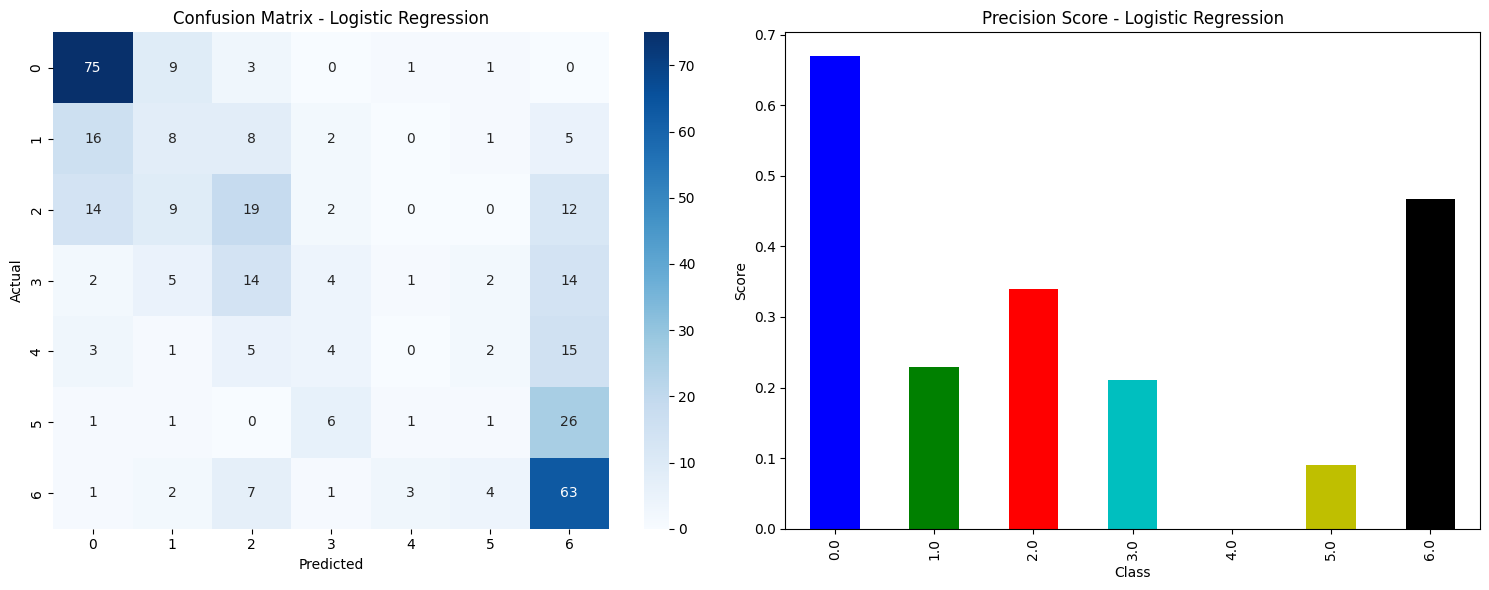

Accuracy: 0.45
Mean Squared Error (MSE): 3.05


Evaluating Random Forest


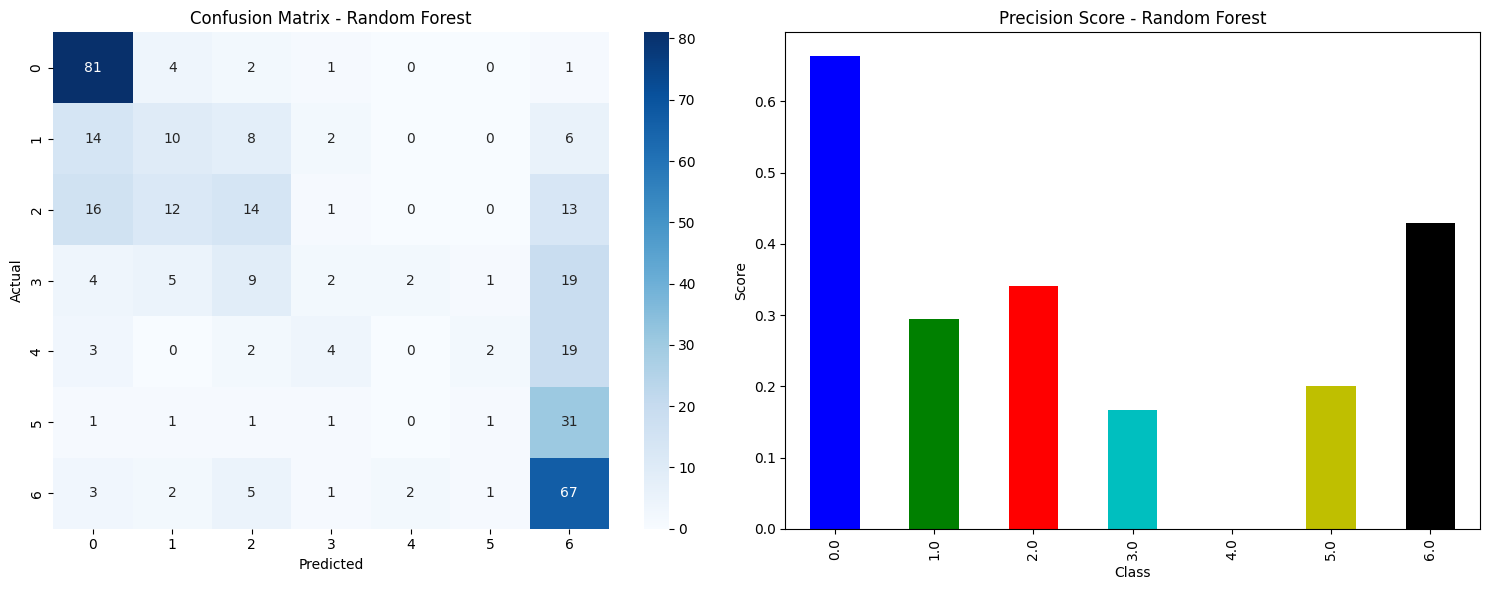

Accuracy: 0.47
Mean Squared Error (MSE): 3.32


Evaluating SVM


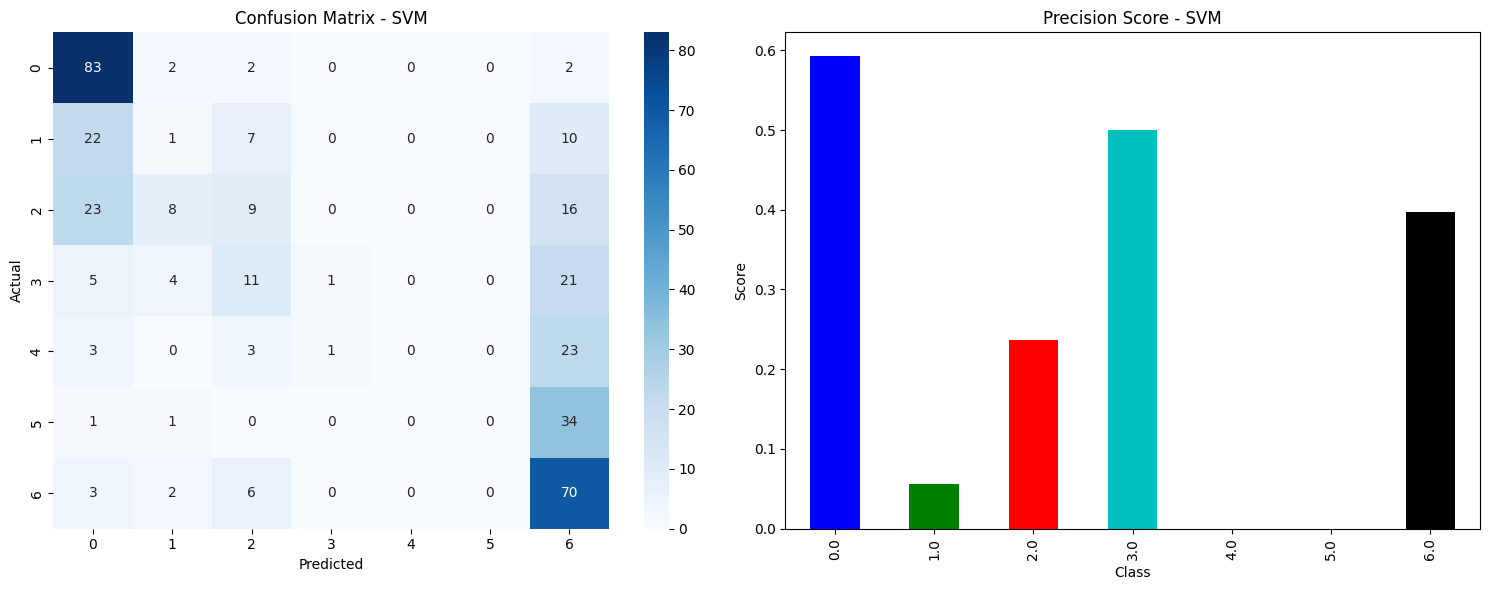

Accuracy: 0.44
Mean Squared Error (MSE): 3.90


Evaluating Decision Tree


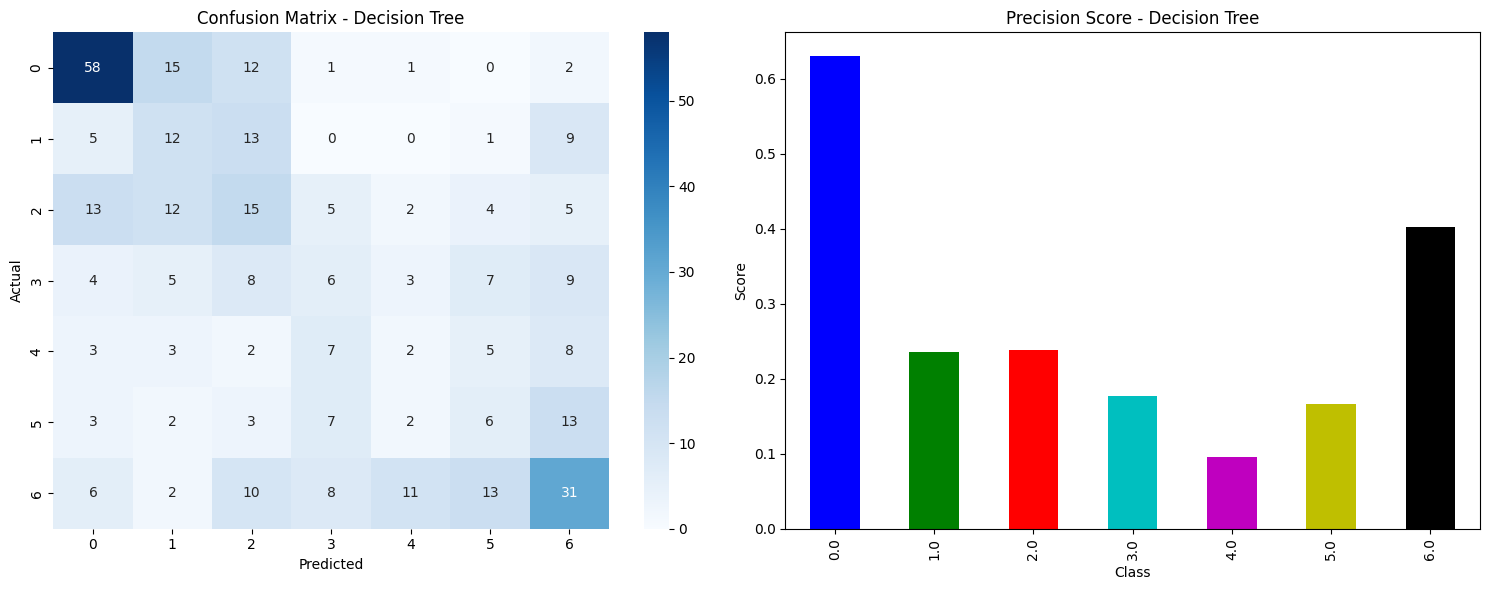

Accuracy: 0.35
Mean Squared Error (MSE): 4.40


Evaluating KNN


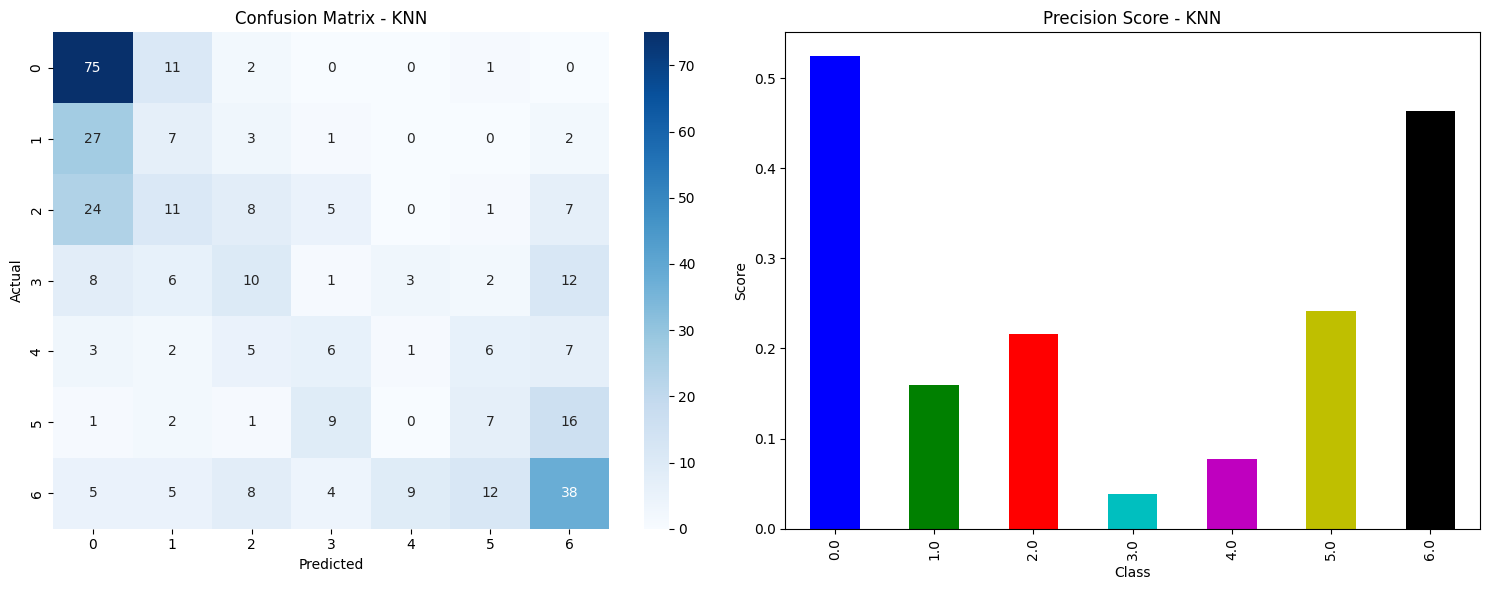

Accuracy: 0.37
Mean Squared Error (MSE): 3.60


Evaluating Naive Bayes


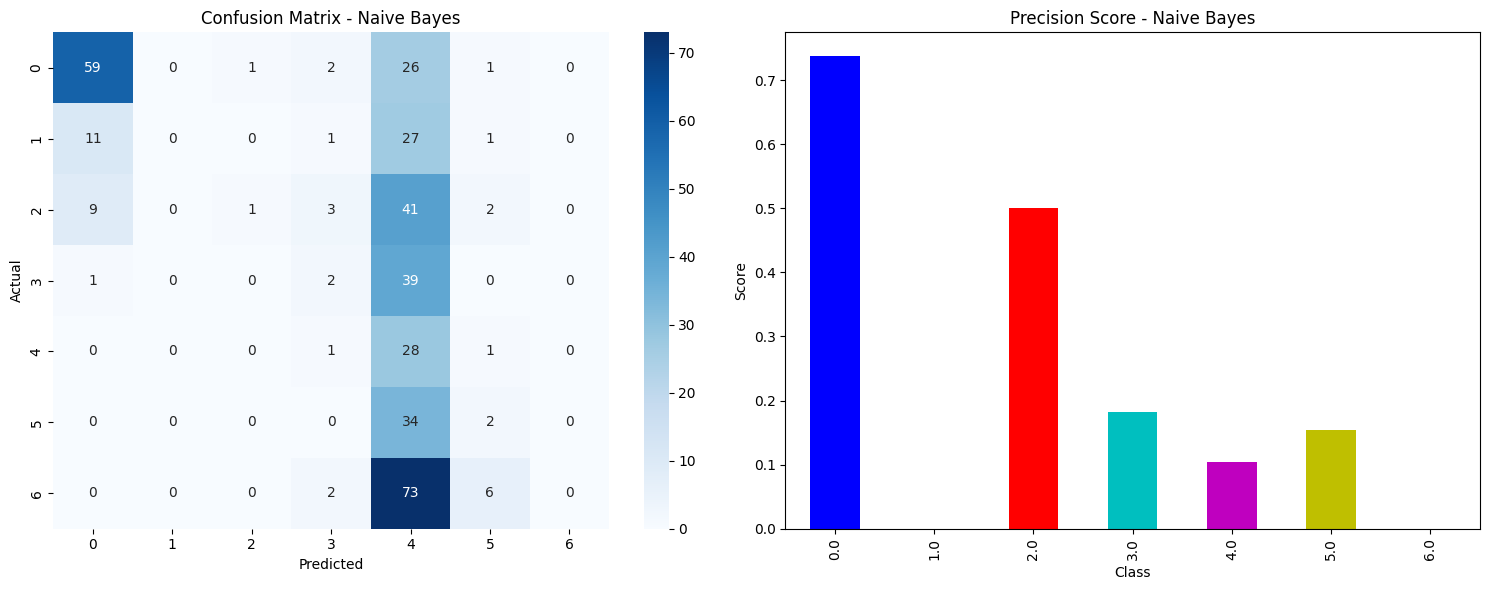

Accuracy: 0.25
Mean Squared Error (MSE): 3.63


Evaluating Gradient Boosting


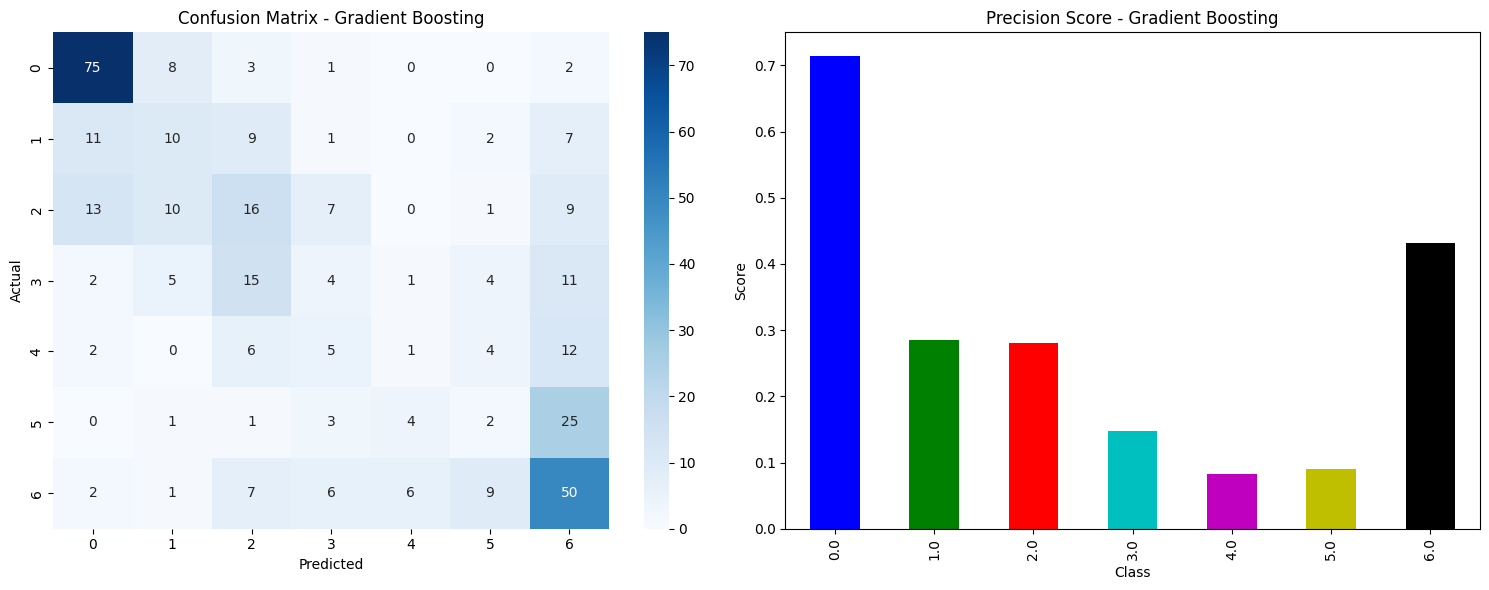

Accuracy: 0.42
Mean Squared Error (MSE): 3.20


Evaluating Hierarchical Gradient Boosting


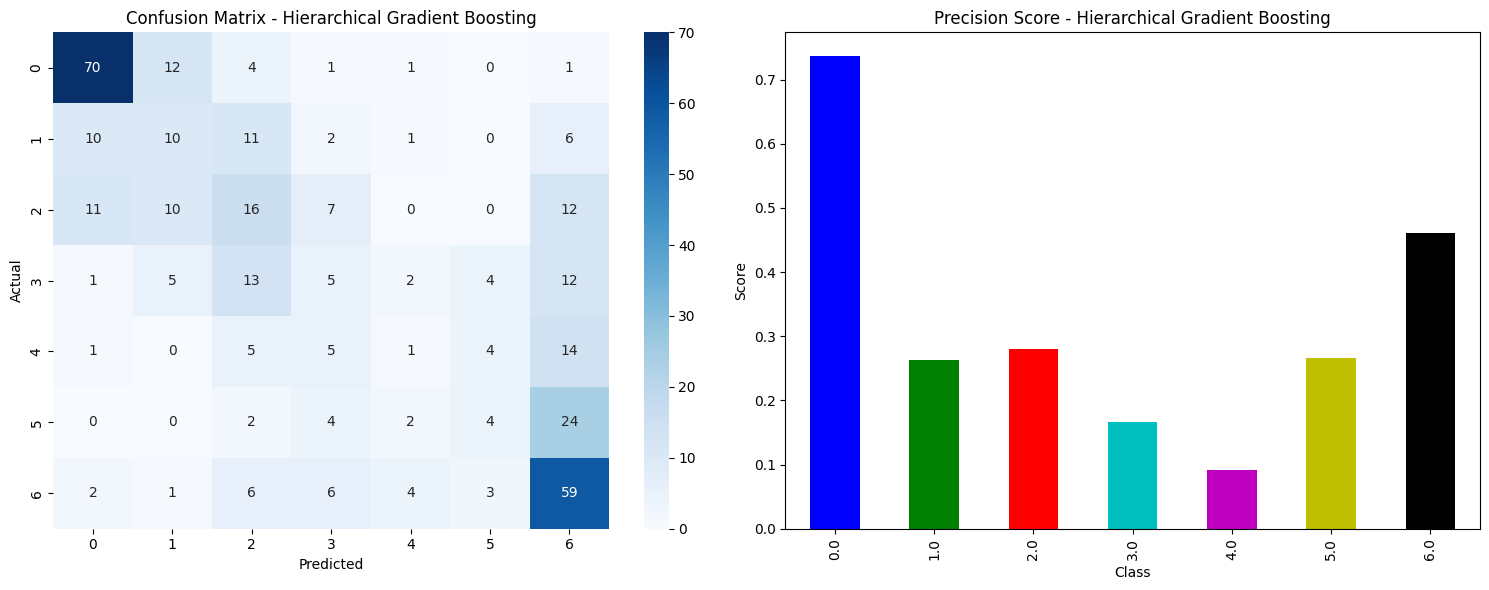

Accuracy: 0.44
Mean Squared Error (MSE): 3.01


Evaluating XGBoost


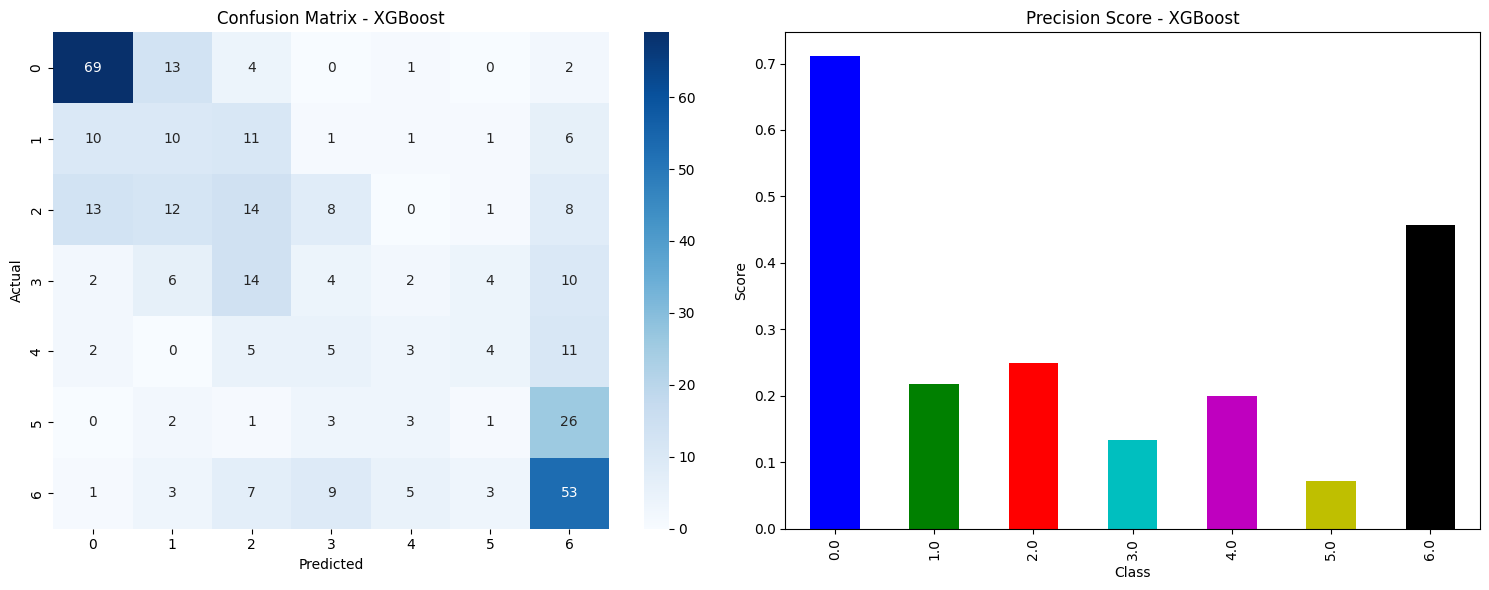

Accuracy: 0.41
Mean Squared Error (MSE): 3.22


Evaluating CatBoost


In [70]:
for target in target_columns:
    run_evals(dataset, target)

#### **Model Comparison**

As we can see above, the algorithms with the highest accuracy are:
* Random Forest
* Hierarchical Gradient Boosting
* XGBoost
* CatBoost

Also, the algorithm with the lowest mean squared error is CatBoost.

From now on, we will focus on these 3 models:
* Random Forest
* Hierarchical Gradient Boosting
* CatBoost


In [ ]:
best_models = {
    'Random Forest' : RandomForestClassifier(),
    'Hierarchical Gradient Boosting': HistGradientBoostingClassifier(),
    'CatBoost' : CatBoostClassifier(verbose=0),
}

#### **Training and Testing the Best Models with Less Information**

Now, we will train and test the best models with less information. We will only use non-drug columns to predict the frequency of drug consumption of an individual.

In [ ]:
for target in target_columns:
    cut_dataset = dataset.copy()
    cut_dataset = cut_dataset.iloc[:, :37]
    cut_dataset[target] = dataset[target]
    run_evals(cut_dataset, target, models=best_models)    

#### **Model Comparison with Less Information**

As we can see above, all models have a lower accuracy and a higher mean squared error when using less information, which is expected.
Now, we will focus on the best model, which is CatBoost, and perform hyperparameter tuning to improve its performance.

#### **Training and Testing the Models for Different Target Values**

Now, we will change the dataset the drug columns to predict if an individual has consumed a drug or not. We will train and test the models using the new dataset and compare their performance.

In [ ]:
binary_dataset = dataset.copy()
for i in range(37, len(binary_dataset.columns)):
    binary_dataset.iloc[:, i] = binary_dataset.iloc[:, i].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
binary_dataset.head(10)

------------------------- Cannabis -------------------------
Evaluating Random Forest


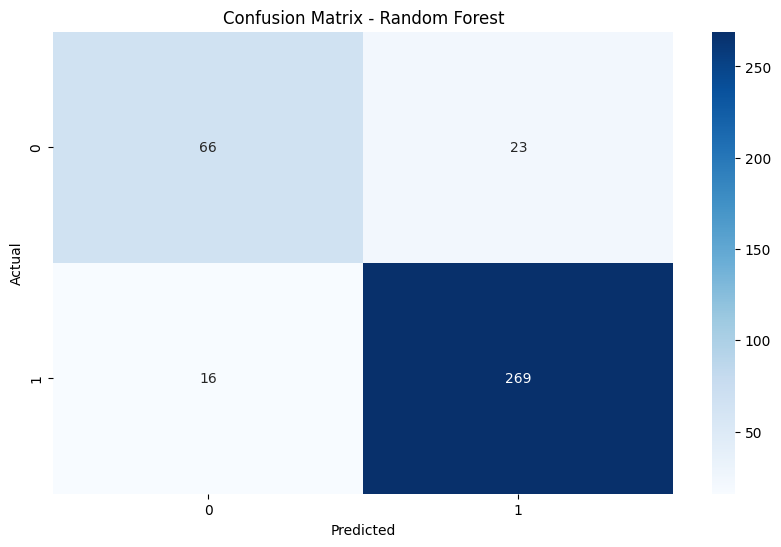

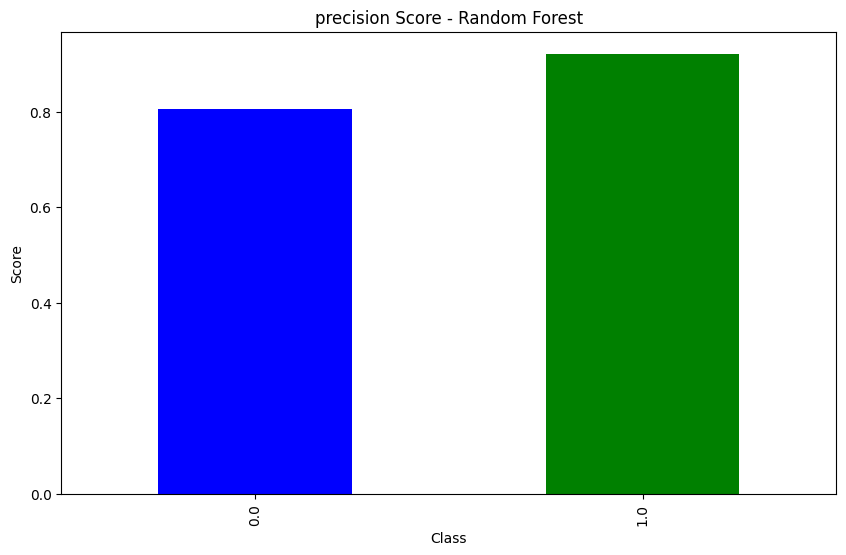

Accuracy: 0.90
Mean Squared Error (MSE): 0.10


Evaluating Hierarchical Gradient Boosting


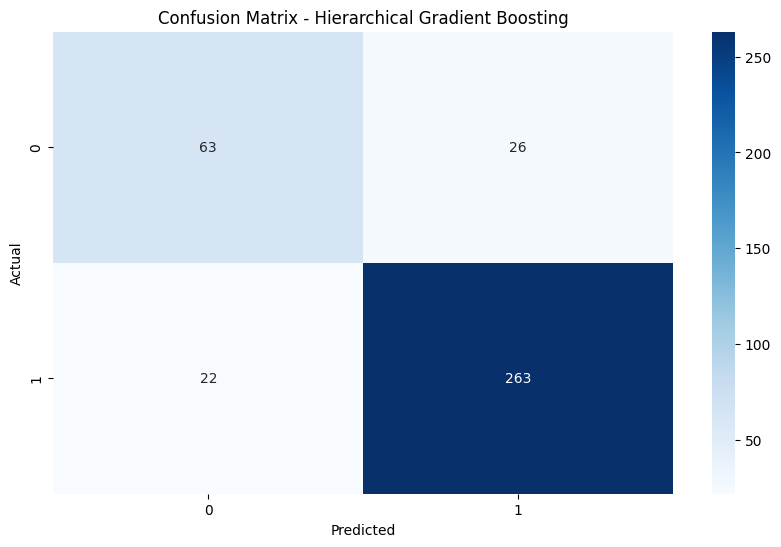

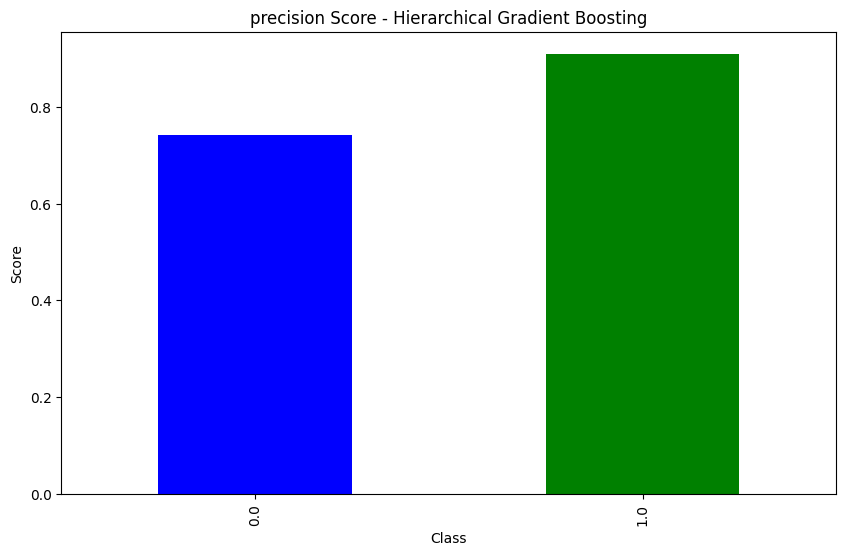

Accuracy: 0.87
Mean Squared Error (MSE): 0.13


Evaluating CatBoost


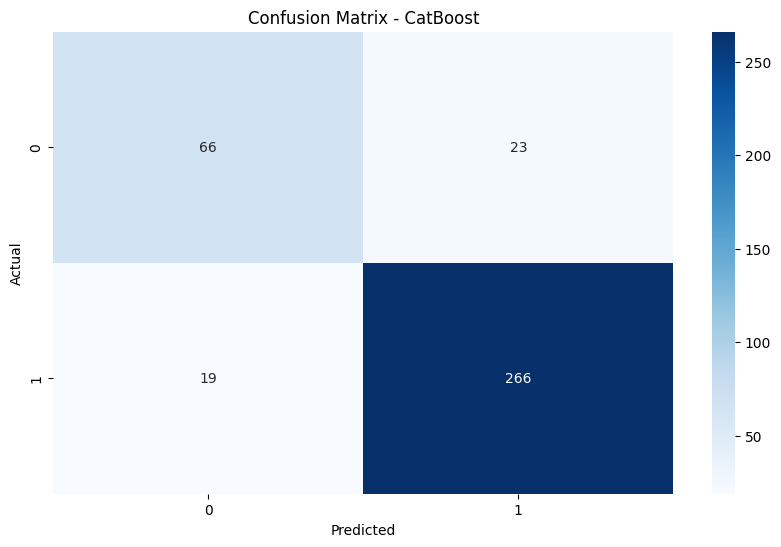

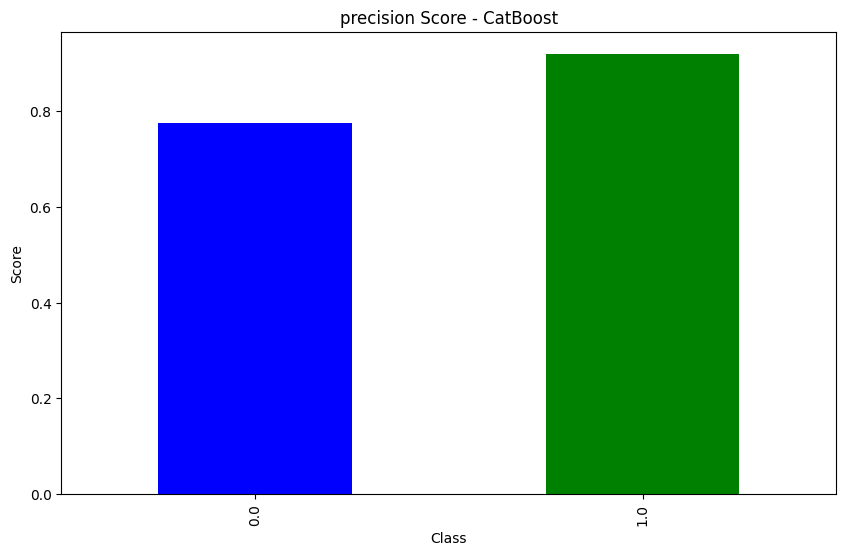

Accuracy: 0.89
Mean Squared Error (MSE): 0.11


Evaluating XGBoost


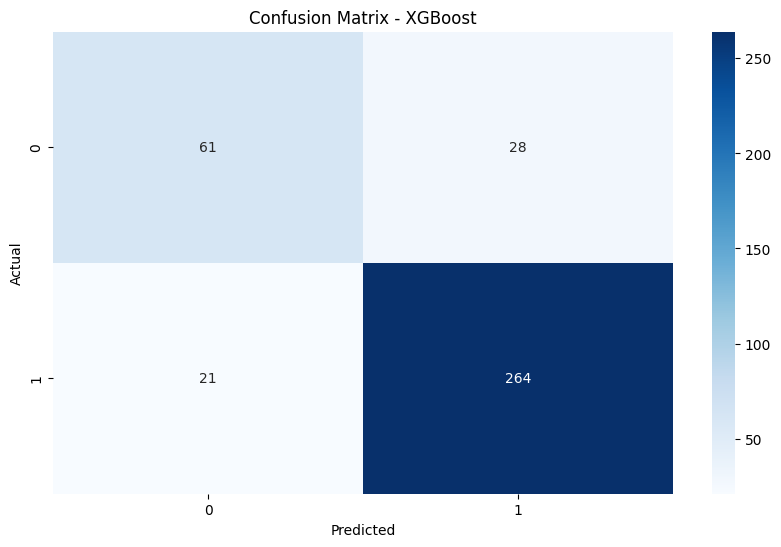

KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

In [ ]:
new_best_models = best_models.copy()

new_best_models['XGBoost'] = XGBClassifier(is_fitted=True)

for target in target_columns:
    run_evals(binary_dataset, target, new_best_models)

#### **Model Comparison for Different Target Values**

As expected, the models have a much higher accuracy and a lower mean squared error when predicting if an individual has consumed a drug or not. The best model seems to be CatBoost, because it tends to have the highest accuracy and the lowest mean squared error.

#### **Training and Testing Models with Target Variables that are Hard to Predict**

Now, we will use the original dataset and the new dataset, but change the target column to columns that have low correlation with the rest of the features.

In [ ]:
dataset.iloc[:, 37:].columns

Using the original dataset:

------------------------- Alcohol -------------------------
Evaluating Random Forest


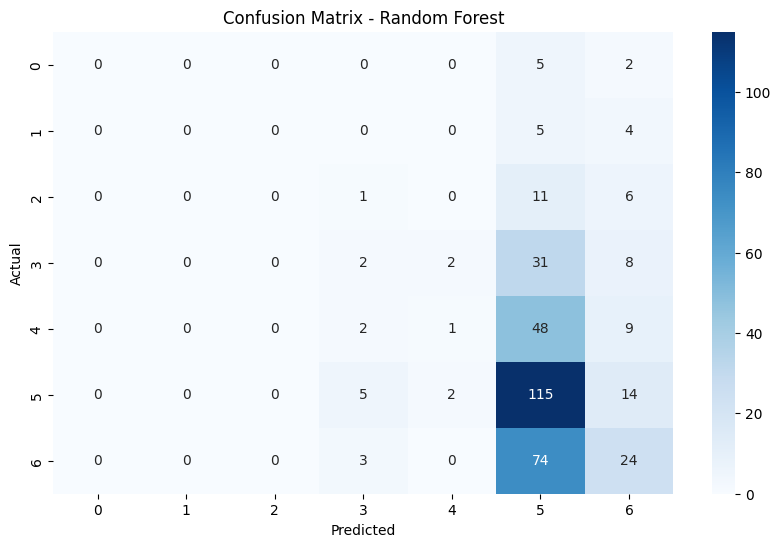

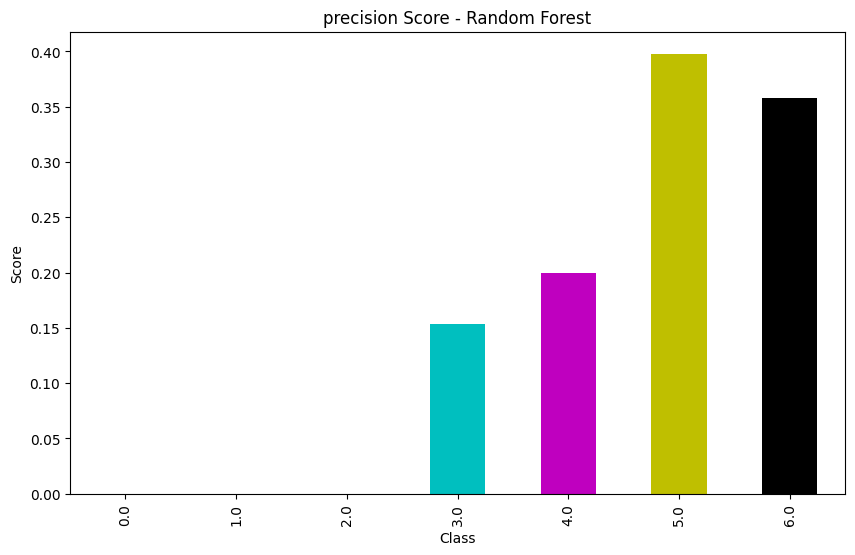

Accuracy: 0.38
Mean Squared Error (MSE): 2.66


Evaluating Hierarchical Gradient Boosting


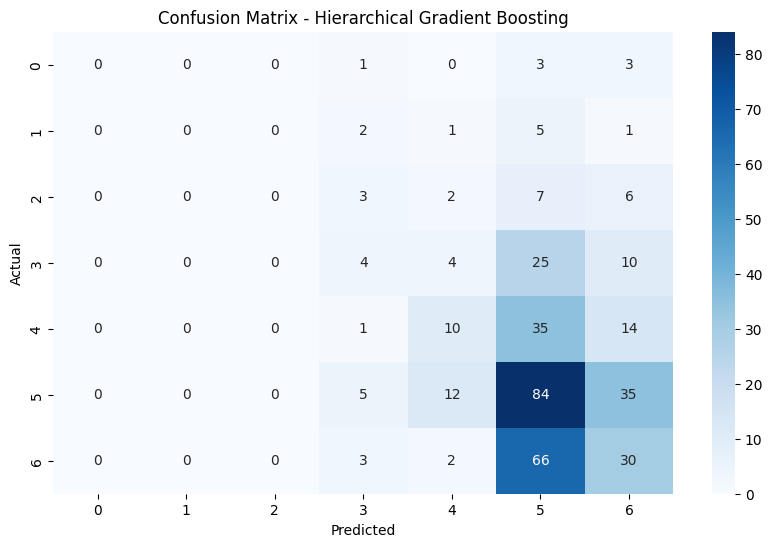

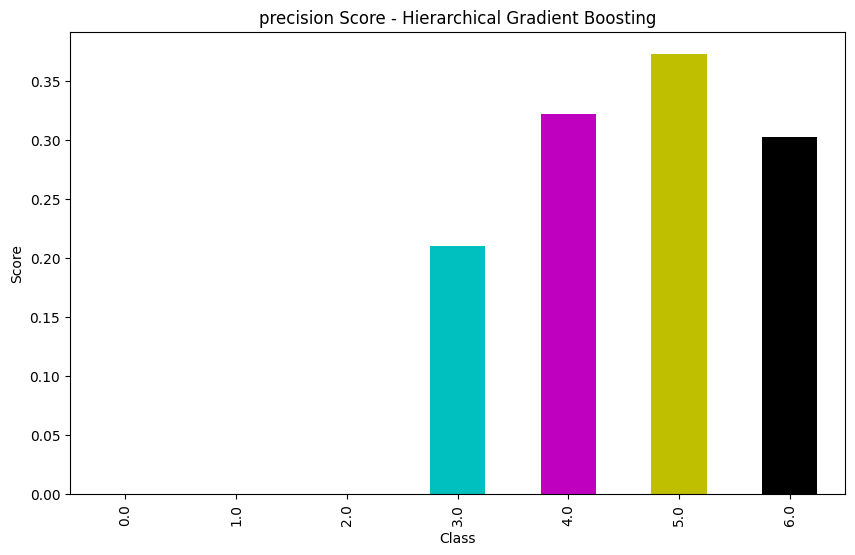

Accuracy: 0.34
Mean Squared Error (MSE): 2.51


Evaluating CatBoost


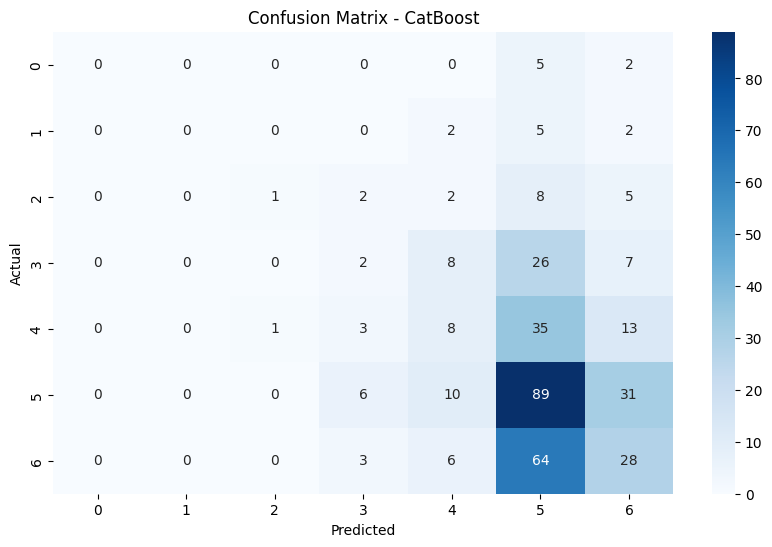

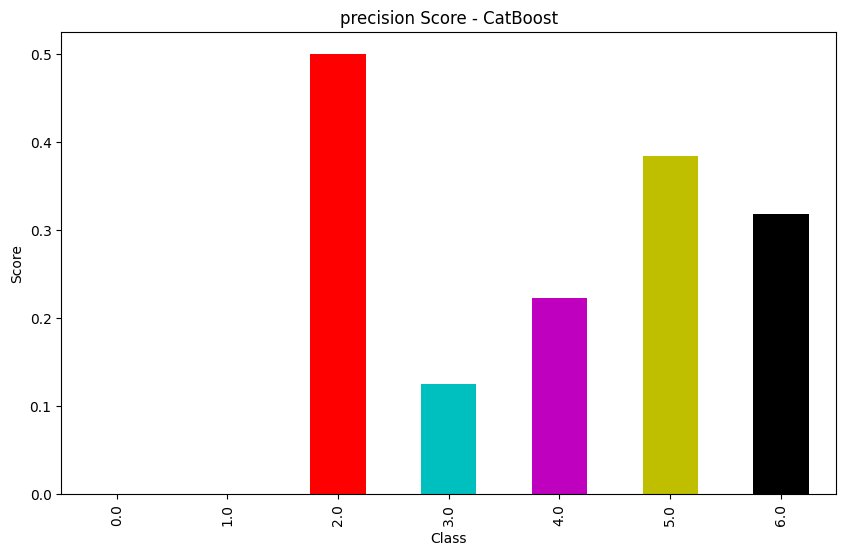

Accuracy: 0.34
Mean Squared Error (MSE): 2.56


Evaluating XGBoost


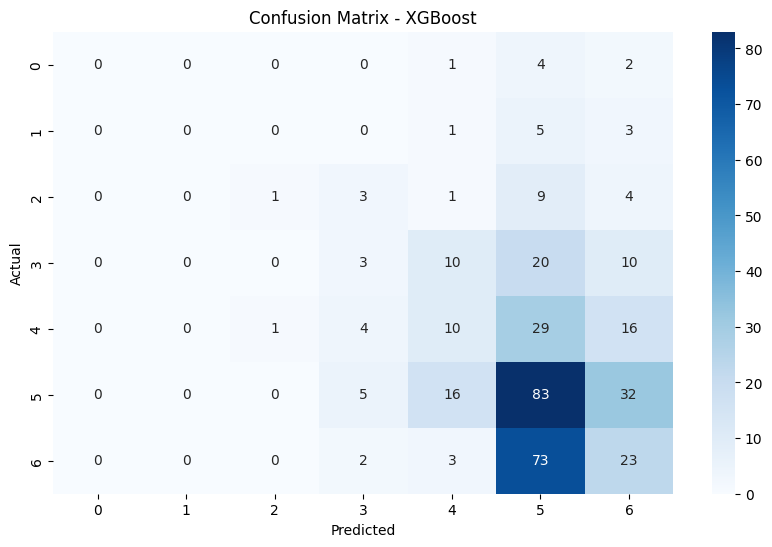

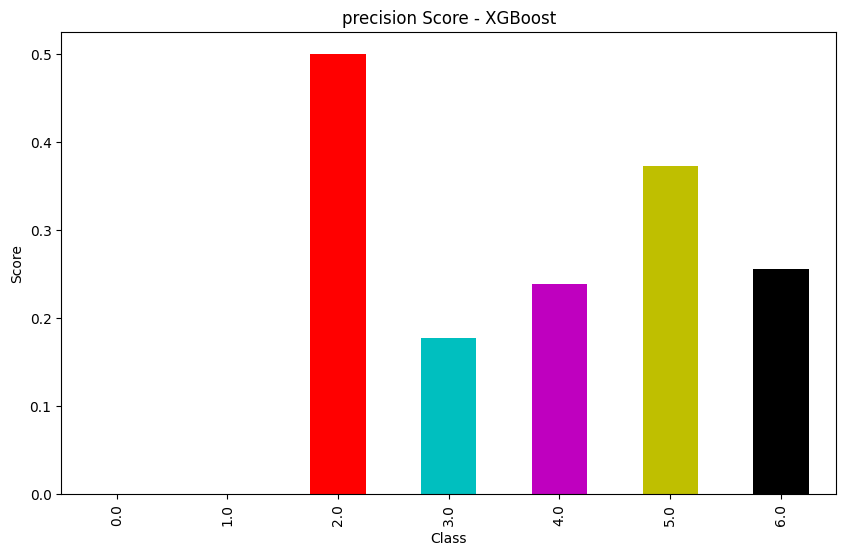

Accuracy: 0.32
Mean Squared Error (MSE): 2.56


------------------------- Caff -------------------------
Evaluating Random Forest


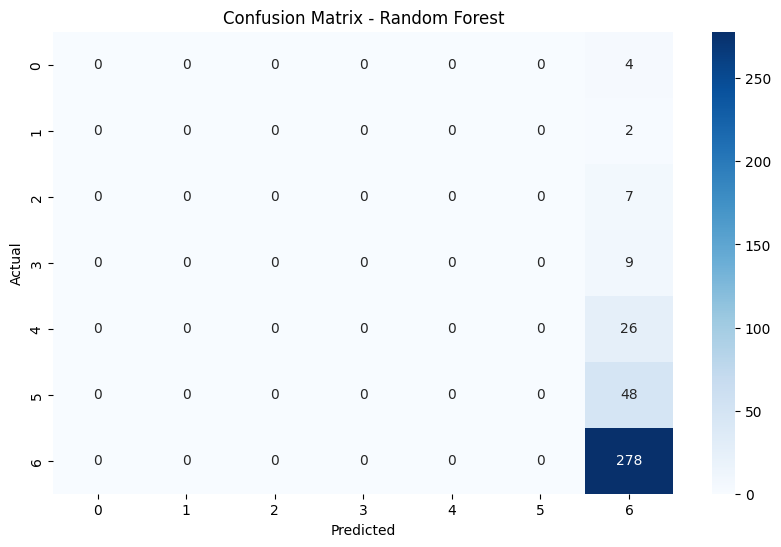

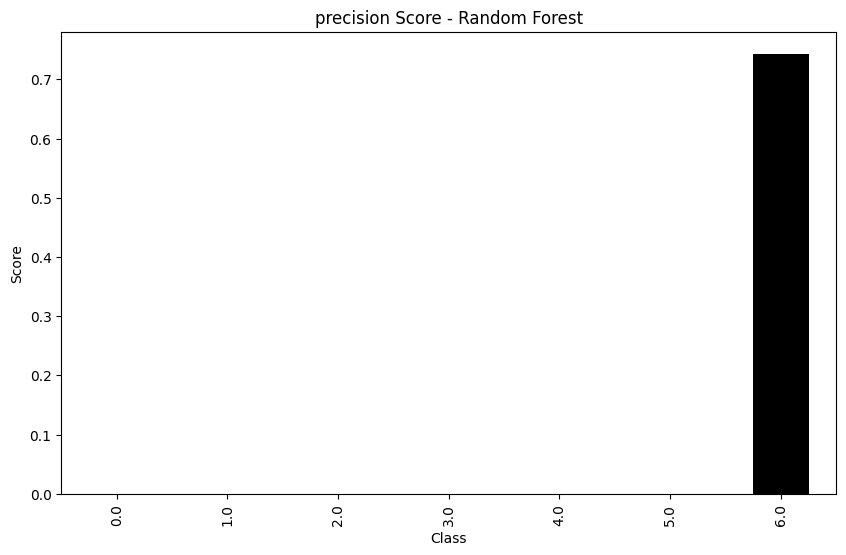

Accuracy: 0.74
Mean Squared Error (MSE): 1.44


Evaluating Hierarchical Gradient Boosting


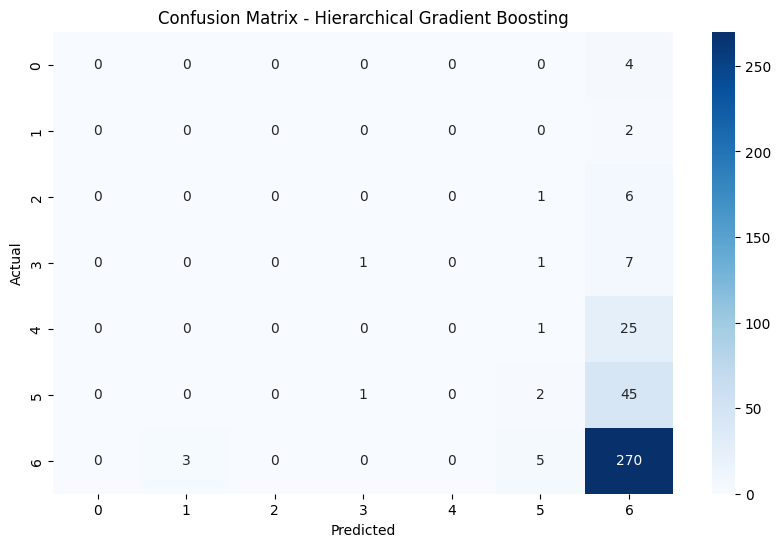

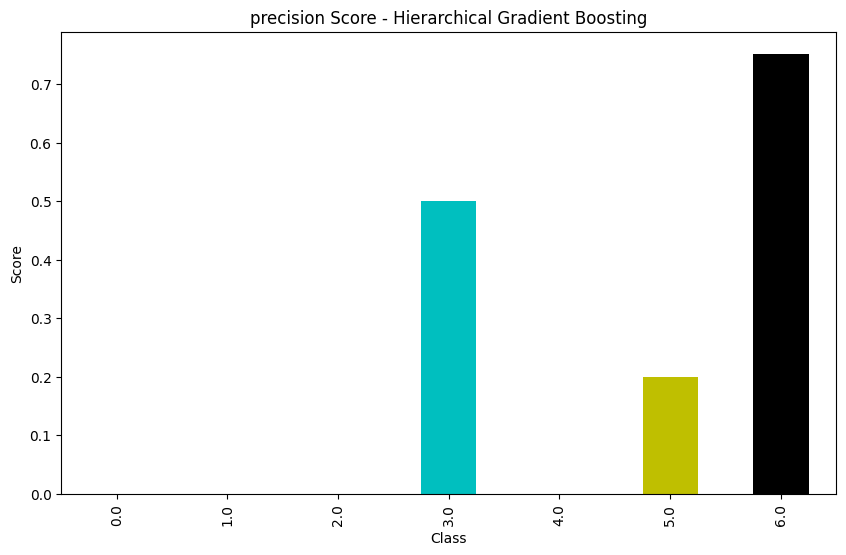

Accuracy: 0.73
Mean Squared Error (MSE): 1.59


Evaluating CatBoost


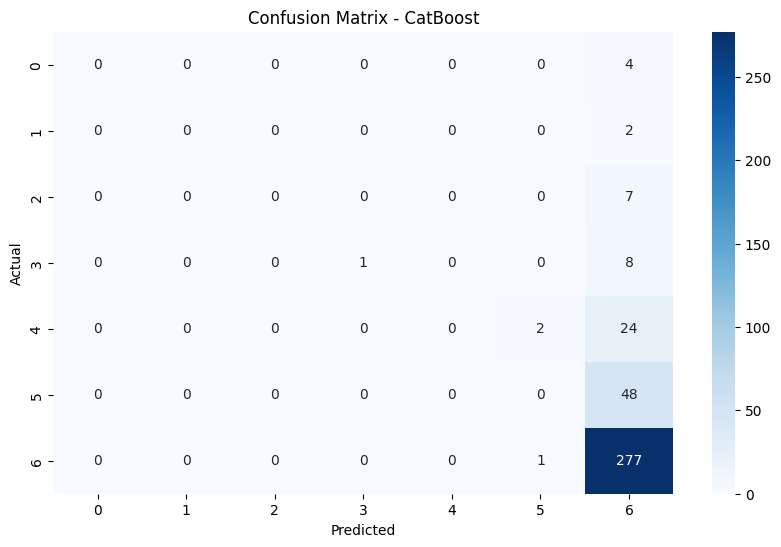

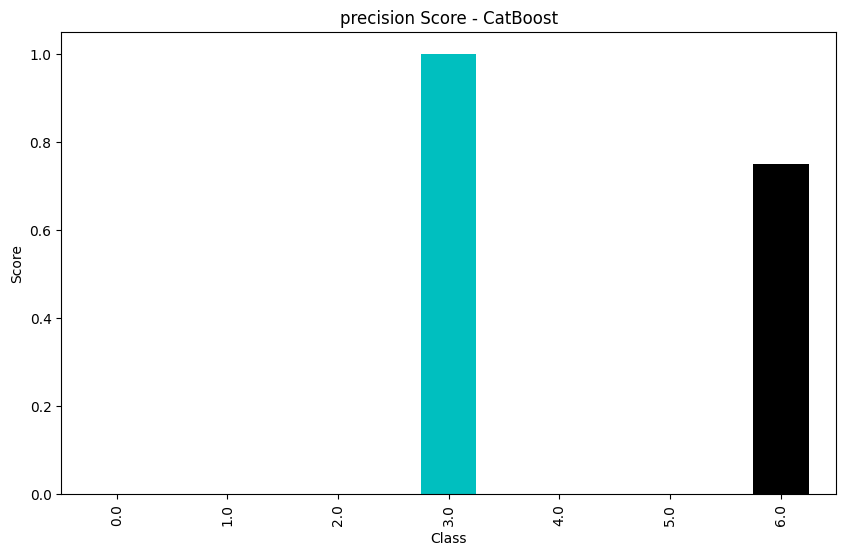

Accuracy: 0.74
Mean Squared Error (MSE): 1.40


Evaluating XGBoost


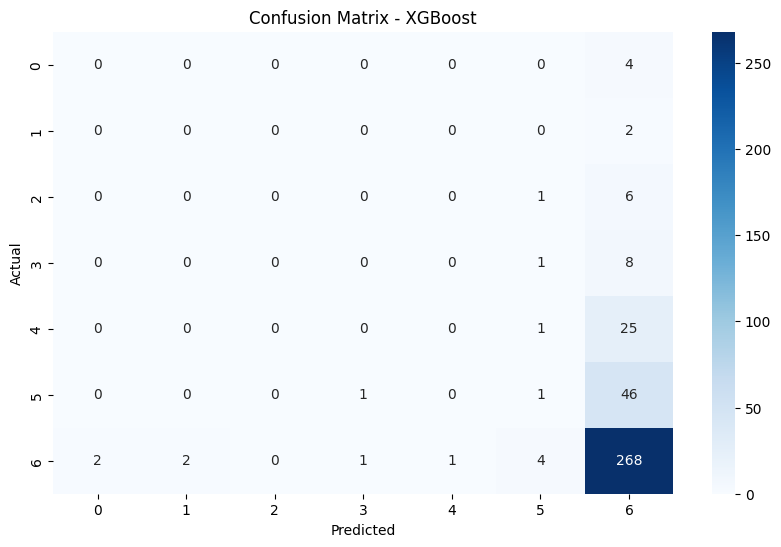

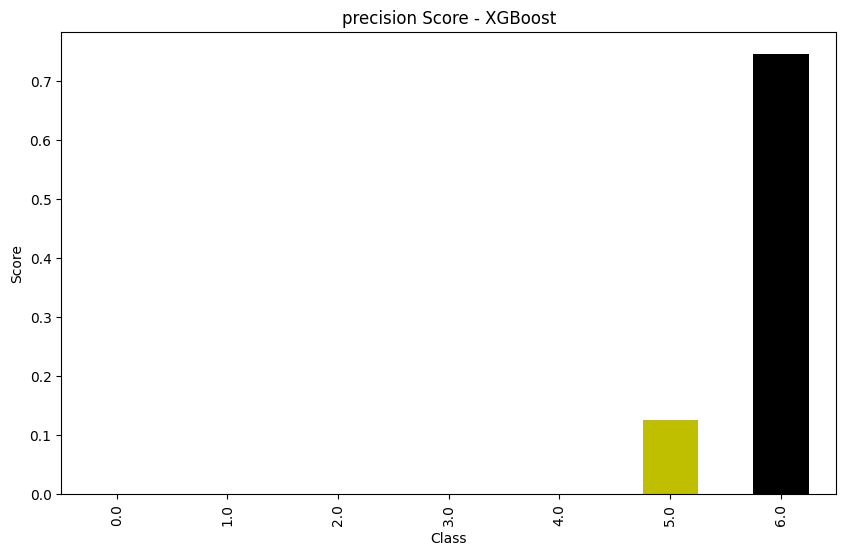

Accuracy: 0.72
Mean Squared Error (MSE): 1.78


------------------------- Choc -------------------------
Evaluating Random Forest


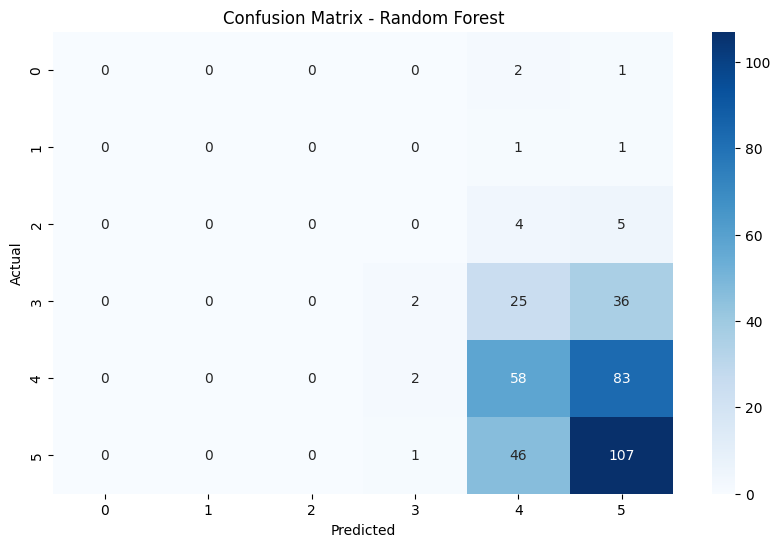

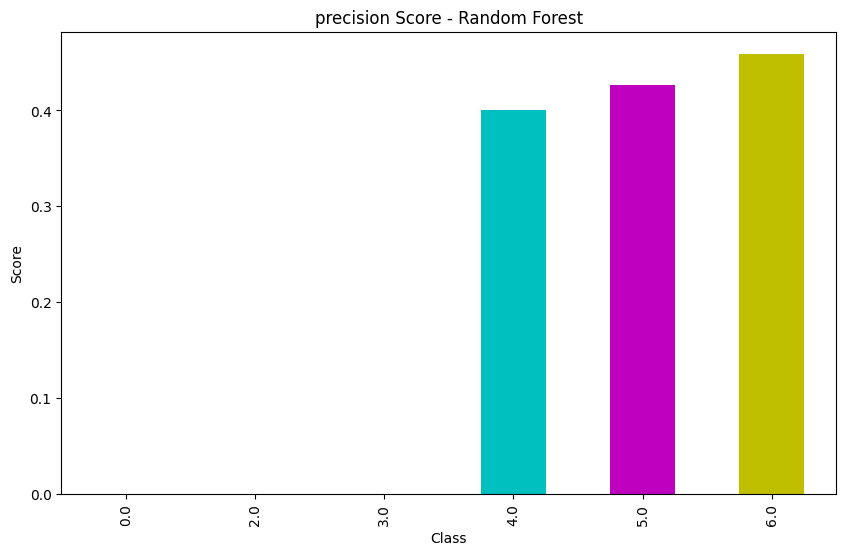

Accuracy: 0.45
Mean Squared Error (MSE): 1.27


Evaluating Hierarchical Gradient Boosting


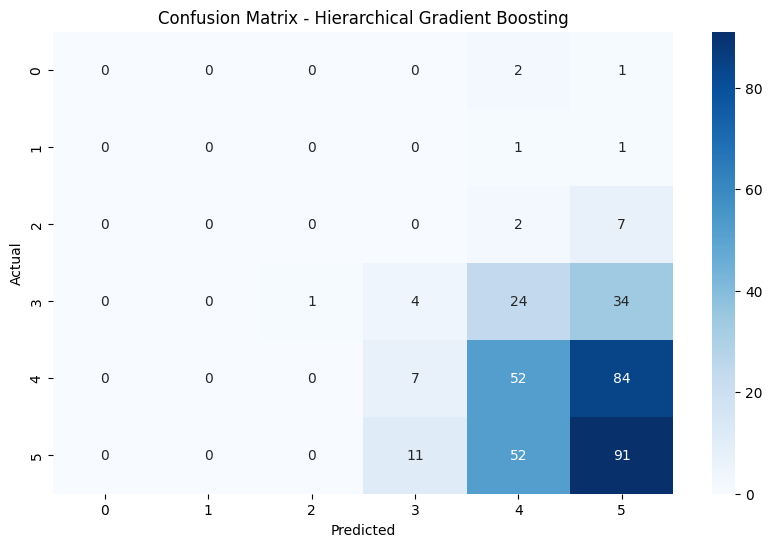

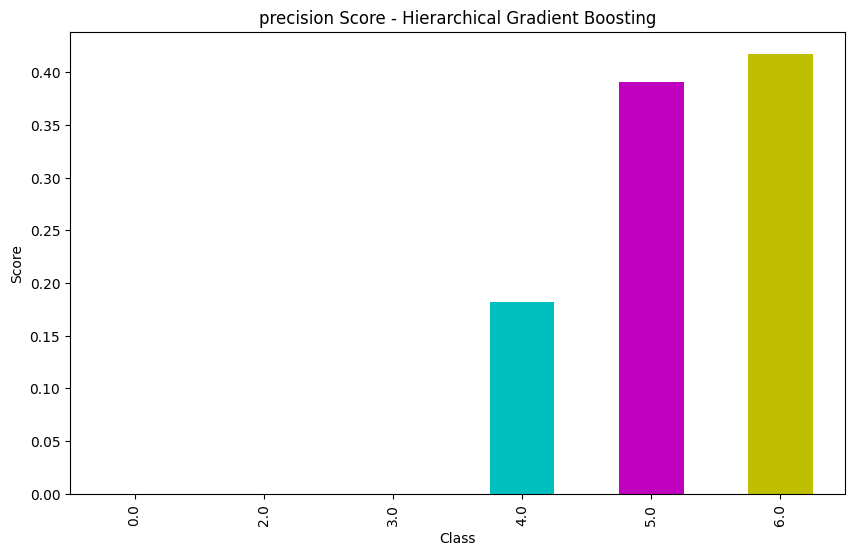

Accuracy: 0.39
Mean Squared Error (MSE): 1.42


Evaluating CatBoost


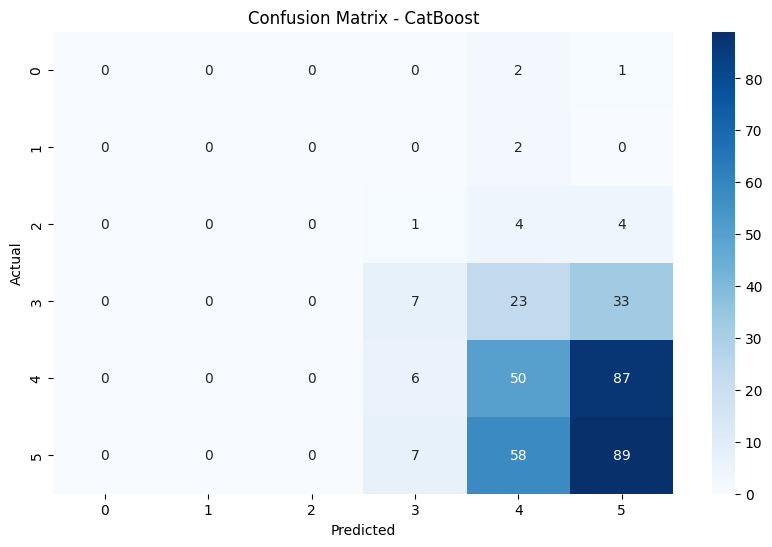

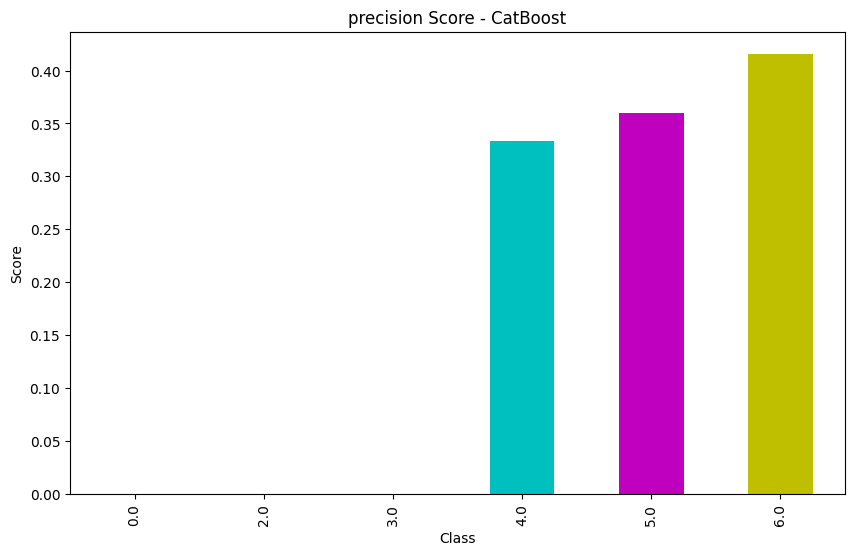

Accuracy: 0.39
Mean Squared Error (MSE): 1.31


Evaluating XGBoost


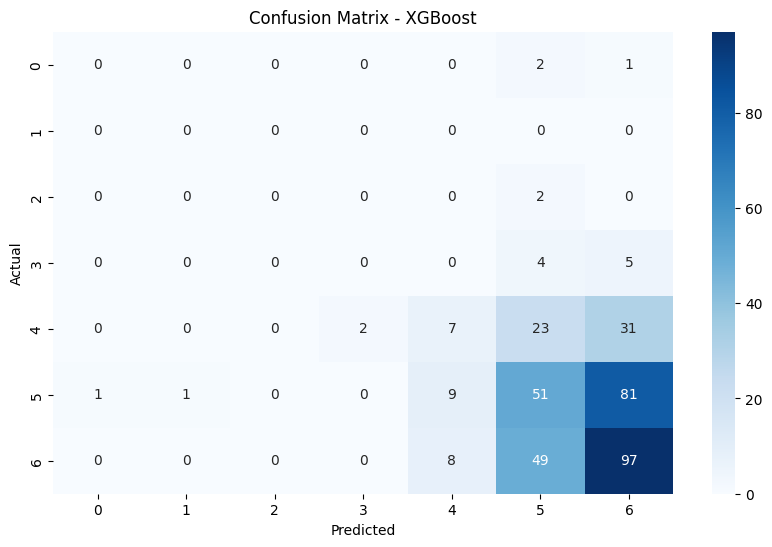

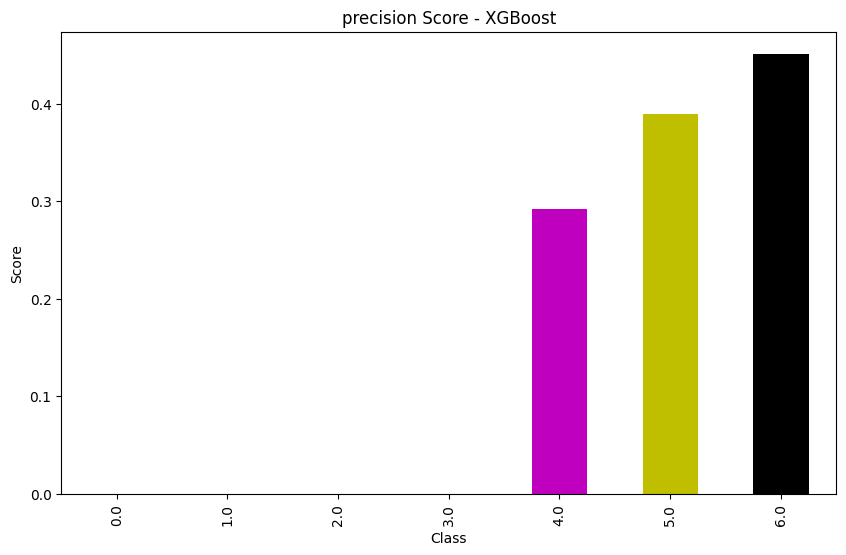

Accuracy: 0.41
Mean Squared Error (MSE): 1.41




In [ ]:
new_target_columns = ['Alcohol', 'Caff', 'Choc']

for target in new_target_columns:
    run_evals(dataset, target, models=best_models)

Using the new dataset:

------------------------- Alcohol -------------------------
Evaluating Random Forest


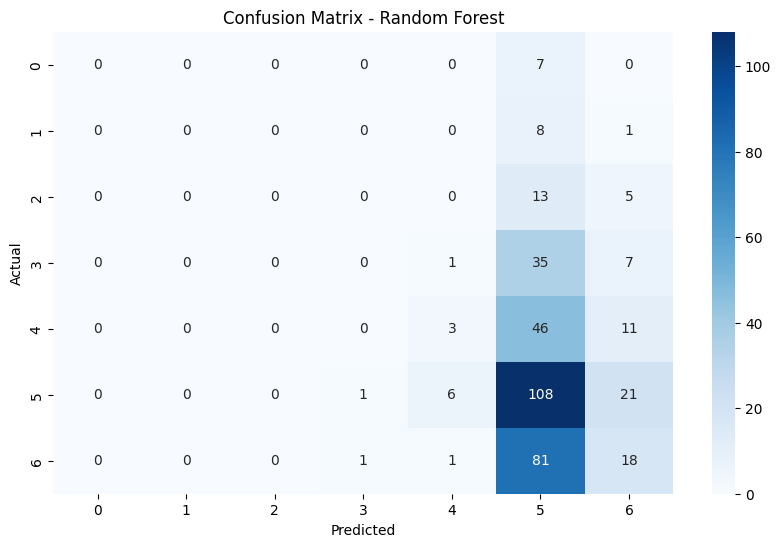

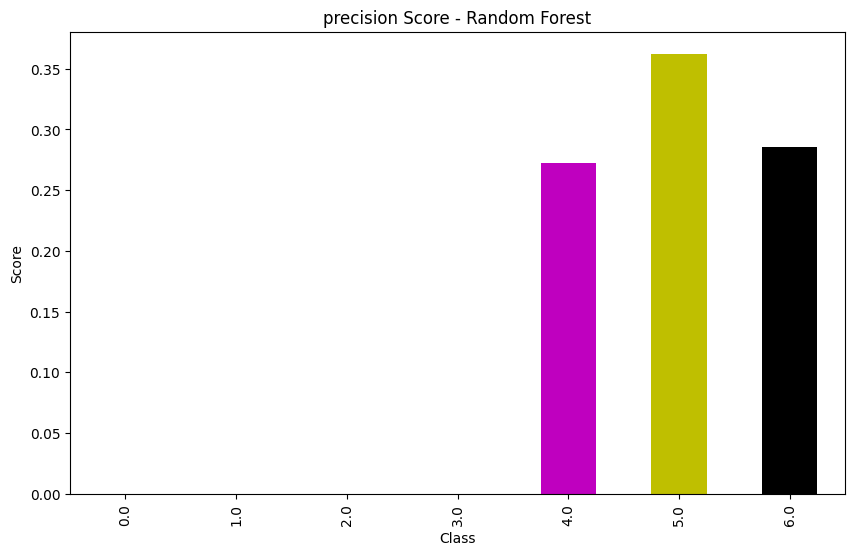

Accuracy: 0.34
Mean Squared Error (MSE): 2.52


Evaluating Hierarchical Gradient Boosting


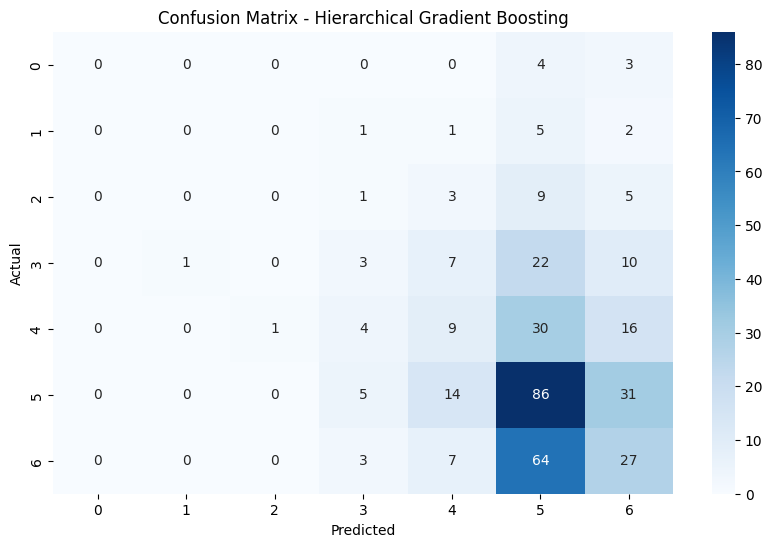

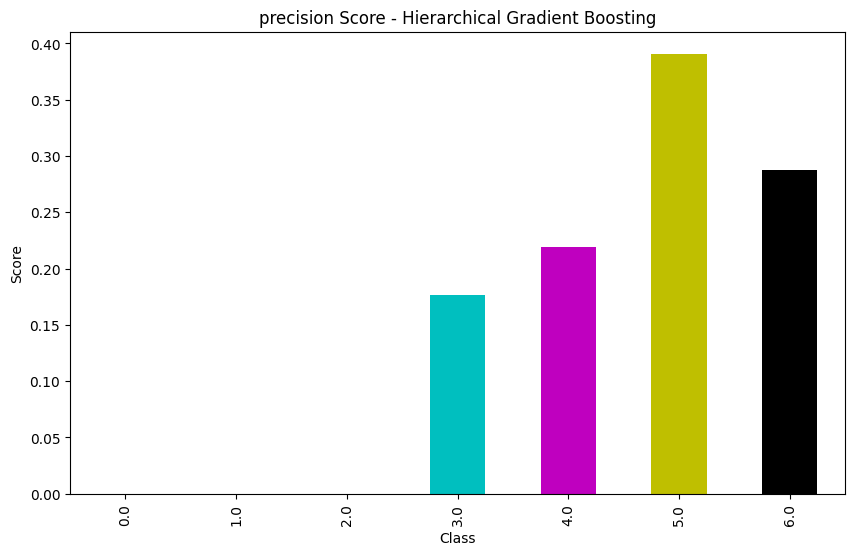

Accuracy: 0.33
Mean Squared Error (MSE): 2.67


Evaluating CatBoost


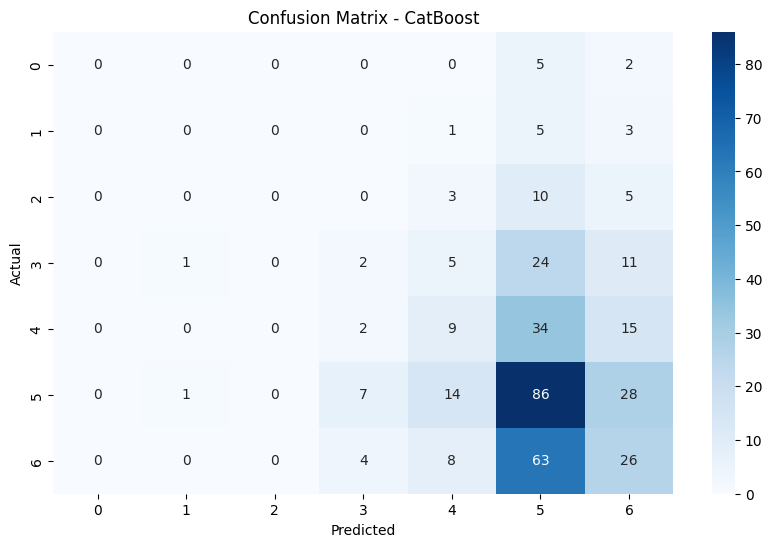

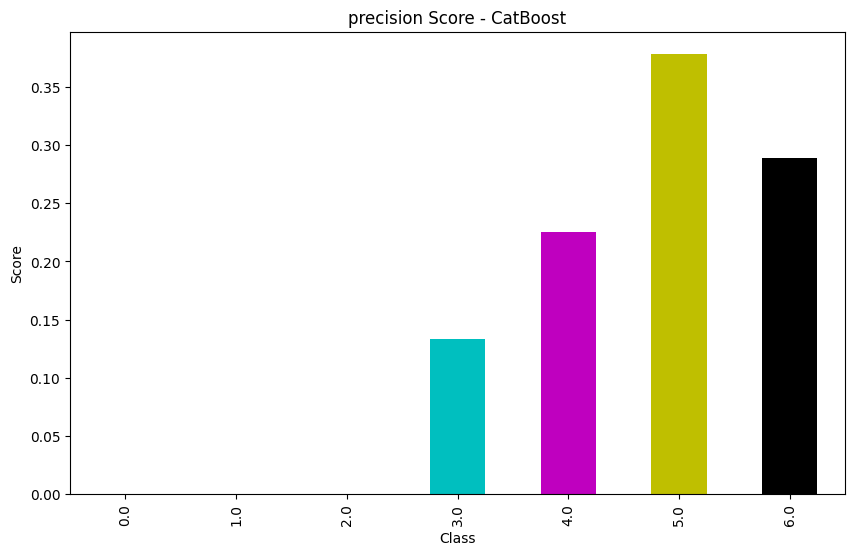

Accuracy: 0.33
Mean Squared Error (MSE): 2.83


Evaluating XGBoost


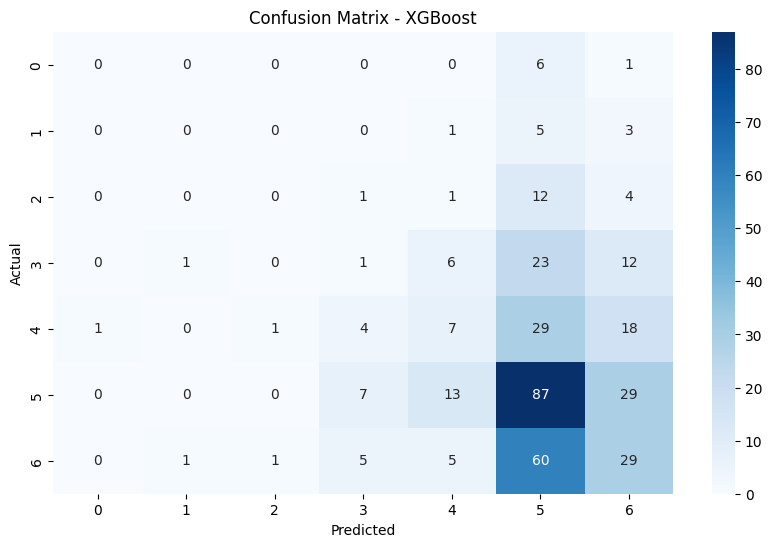

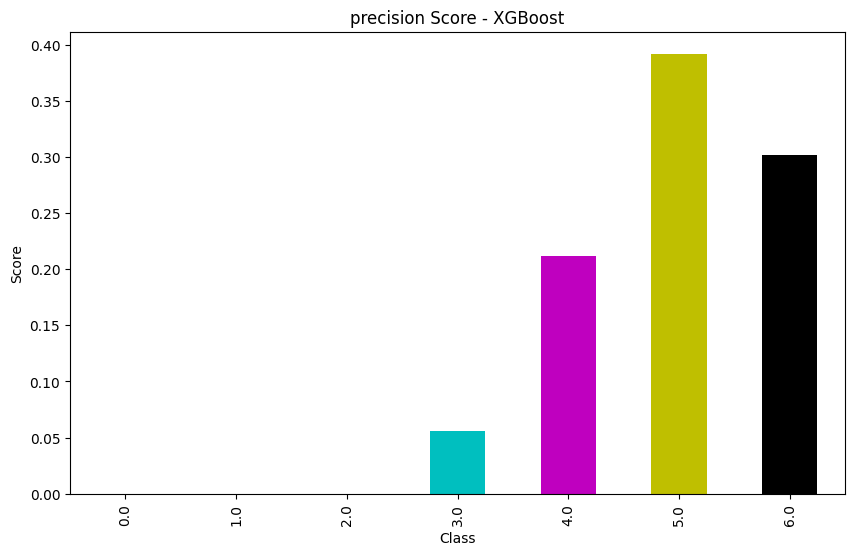

Accuracy: 0.33
Mean Squared Error (MSE): 2.94


------------------------- Caff -------------------------
Evaluating Random Forest


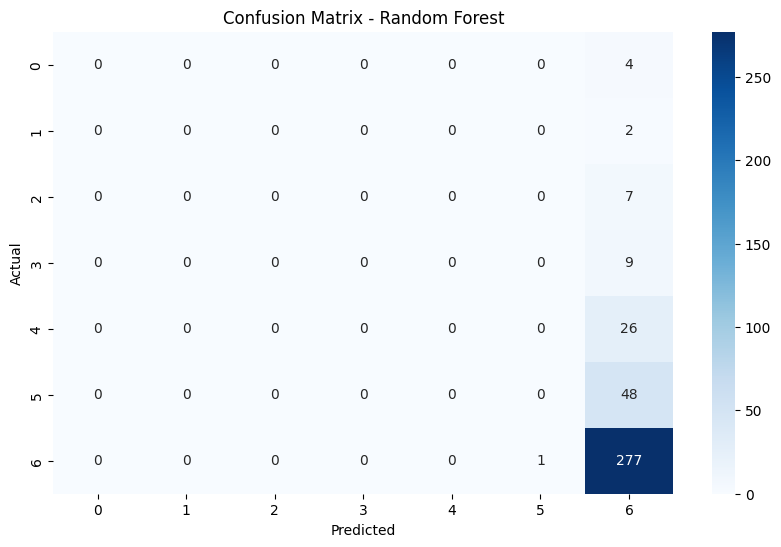

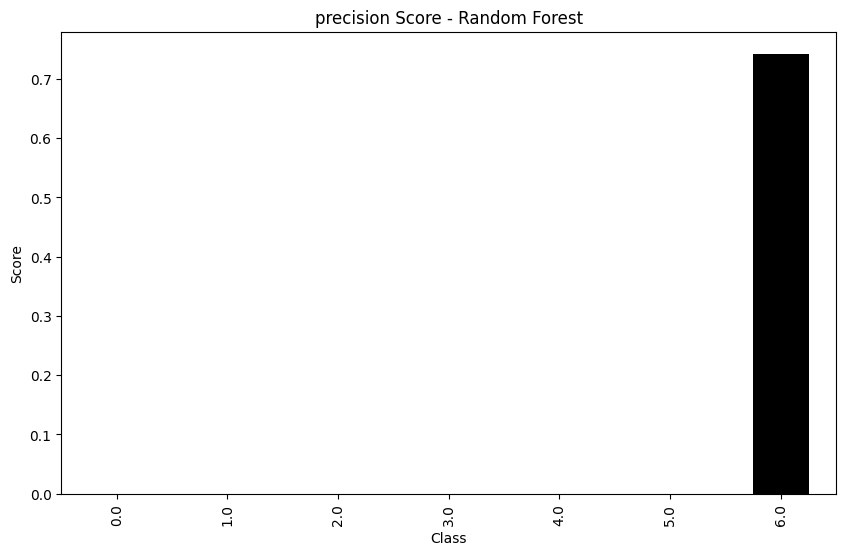

Accuracy: 0.74
Mean Squared Error (MSE): 1.44


Evaluating Hierarchical Gradient Boosting


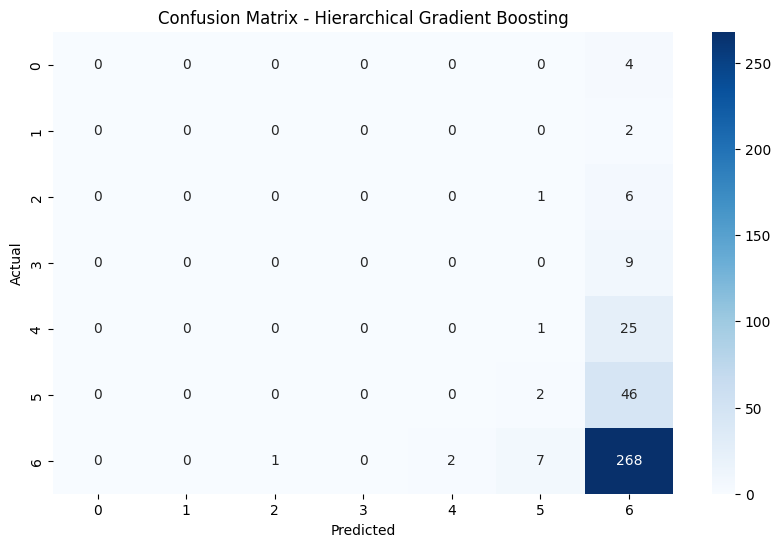

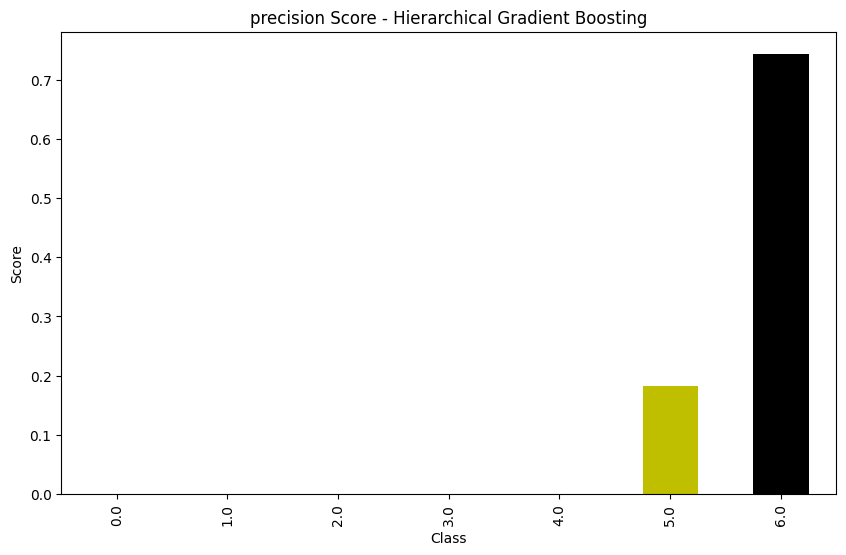

Accuracy: 0.72
Mean Squared Error (MSE): 1.49


Evaluating CatBoost


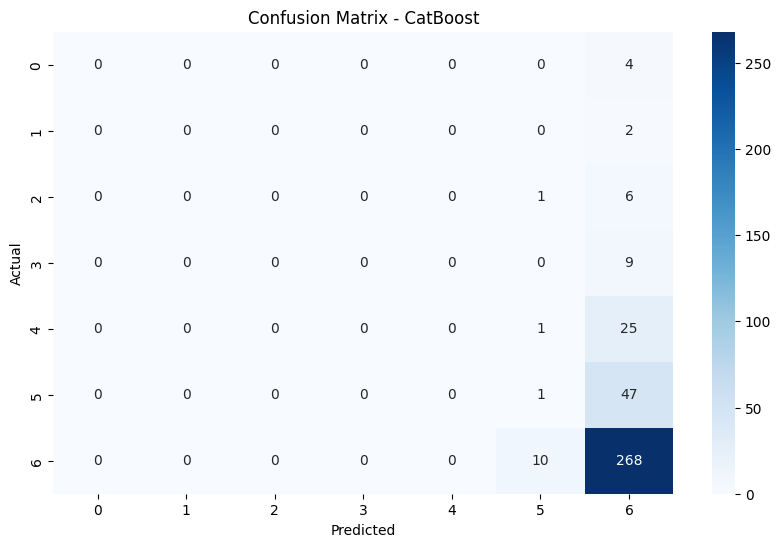

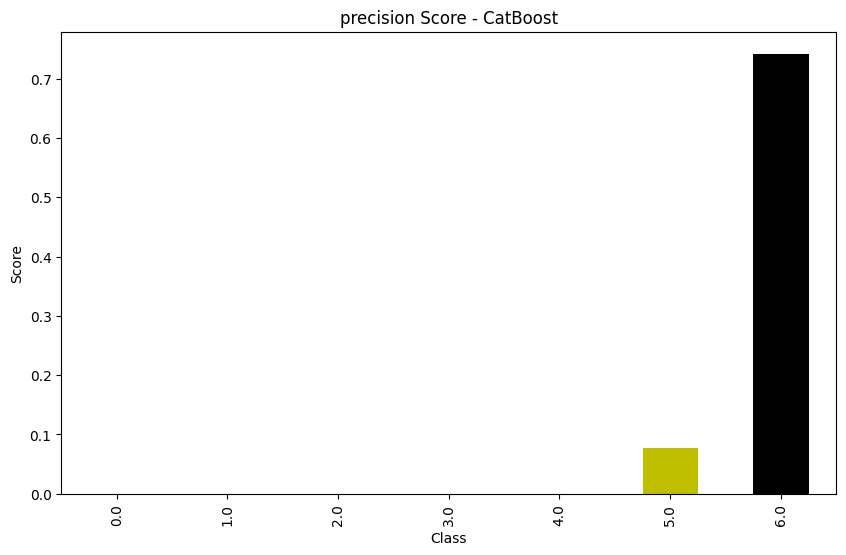

Accuracy: 0.72
Mean Squared Error (MSE): 1.44


Evaluating XGBoost


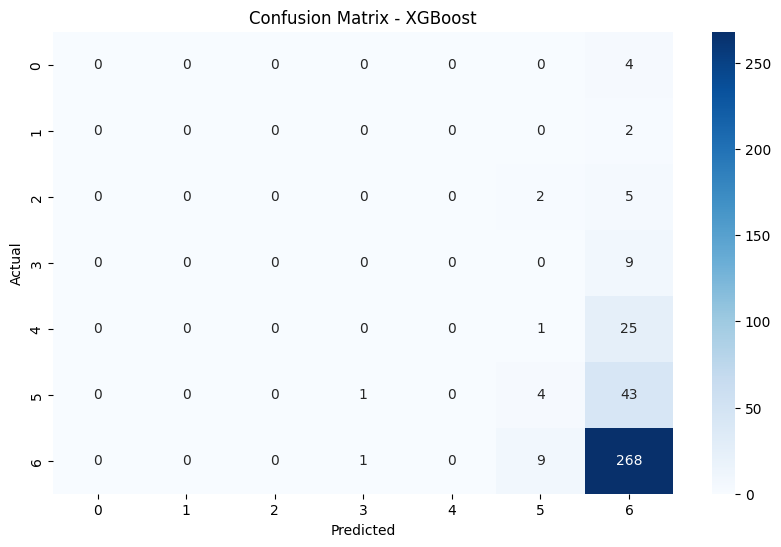

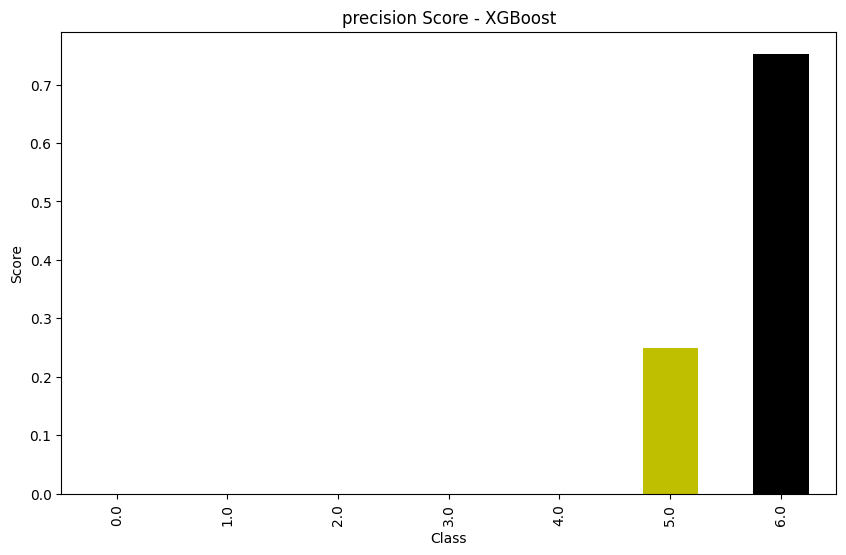

Accuracy: 0.73
Mean Squared Error (MSE): 1.44


------------------------- Choc -------------------------
Evaluating Random Forest


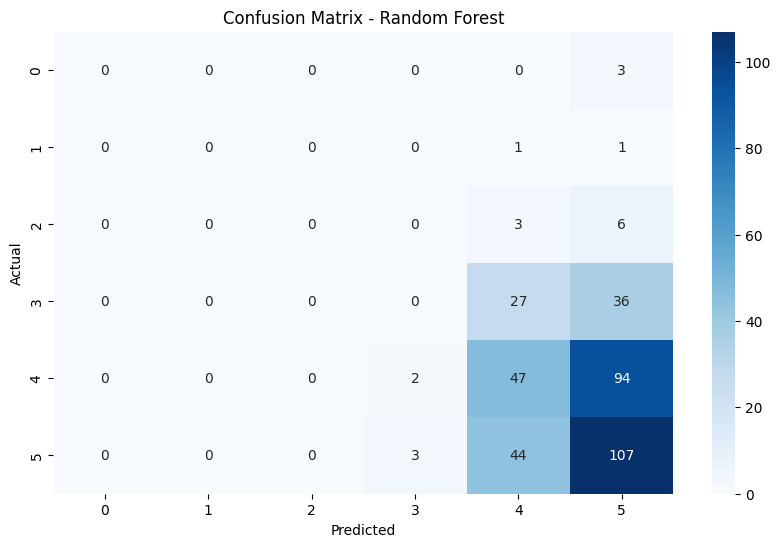

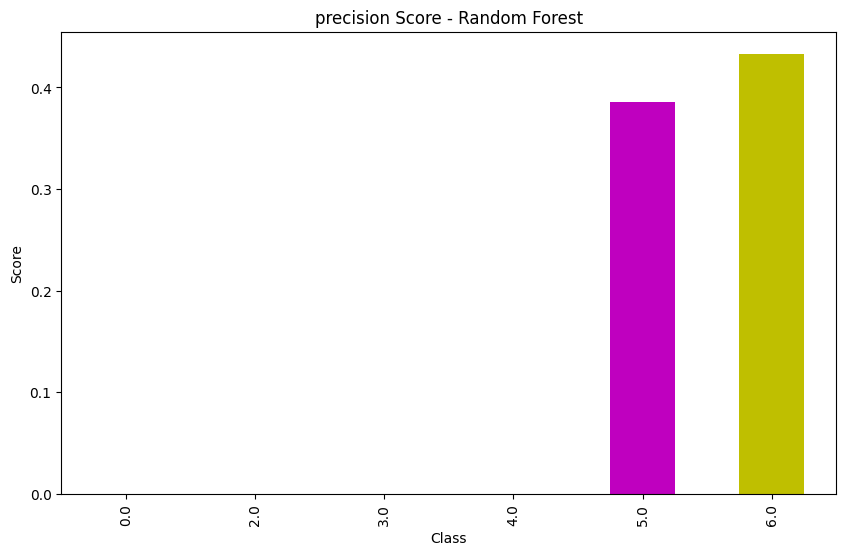

Accuracy: 0.41
Mean Squared Error (MSE): 1.40


Evaluating Hierarchical Gradient Boosting


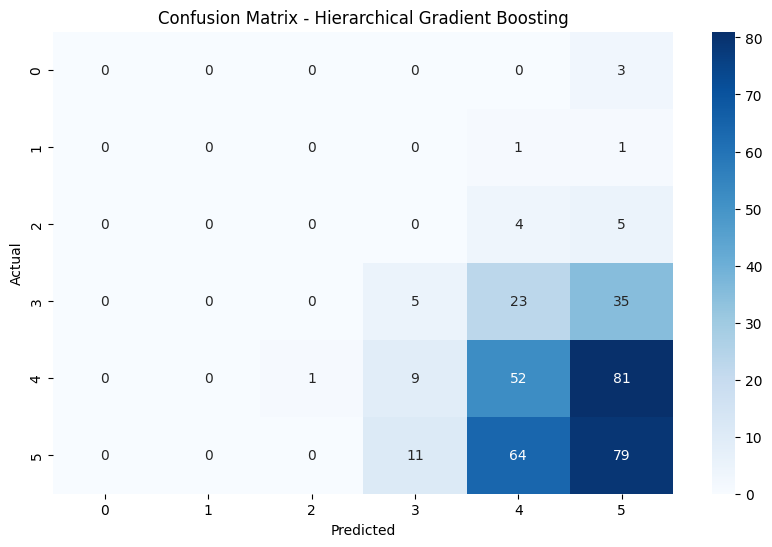

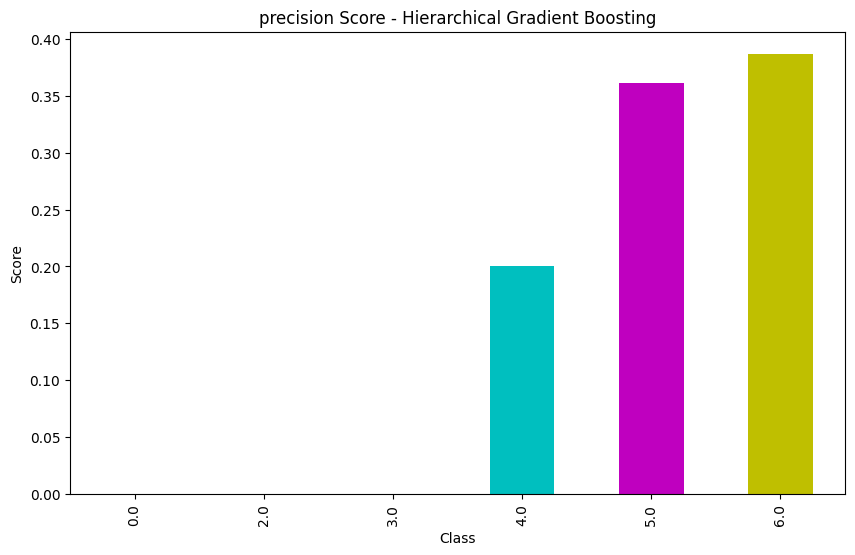

Accuracy: 0.36
Mean Squared Error (MSE): 1.49


Evaluating CatBoost


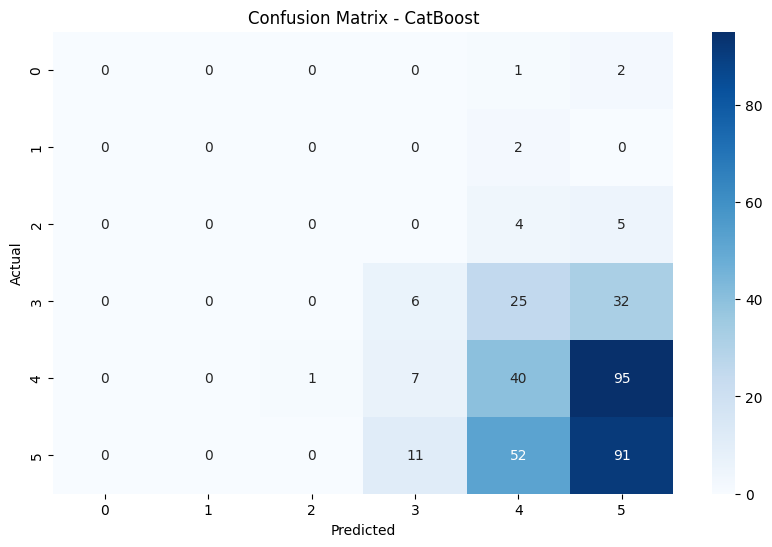

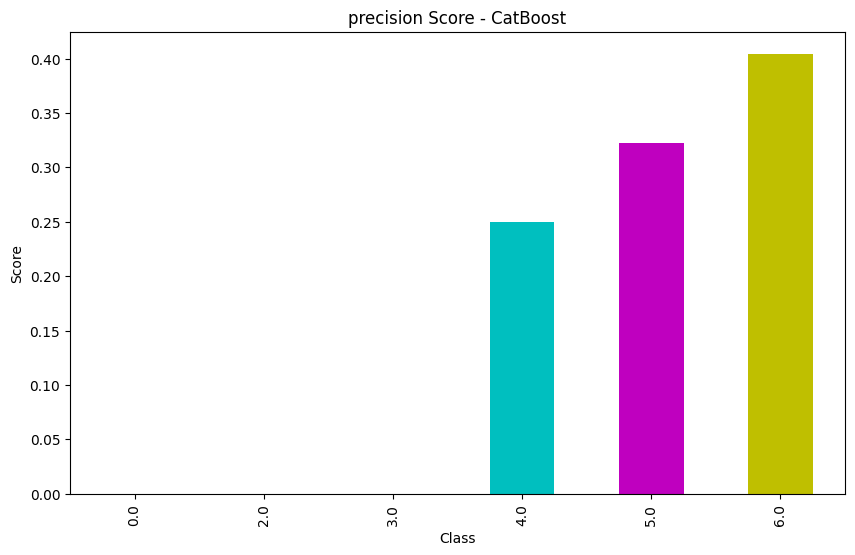

Accuracy: 0.37
Mean Squared Error (MSE): 1.42


Evaluating XGBoost


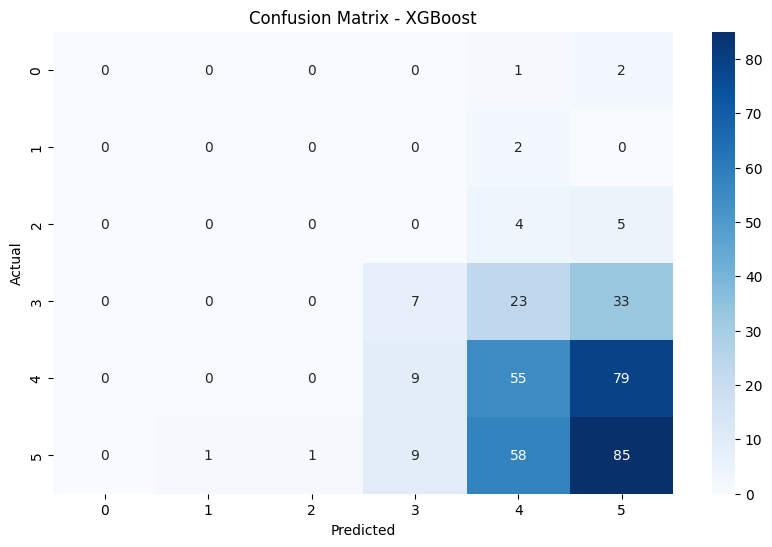

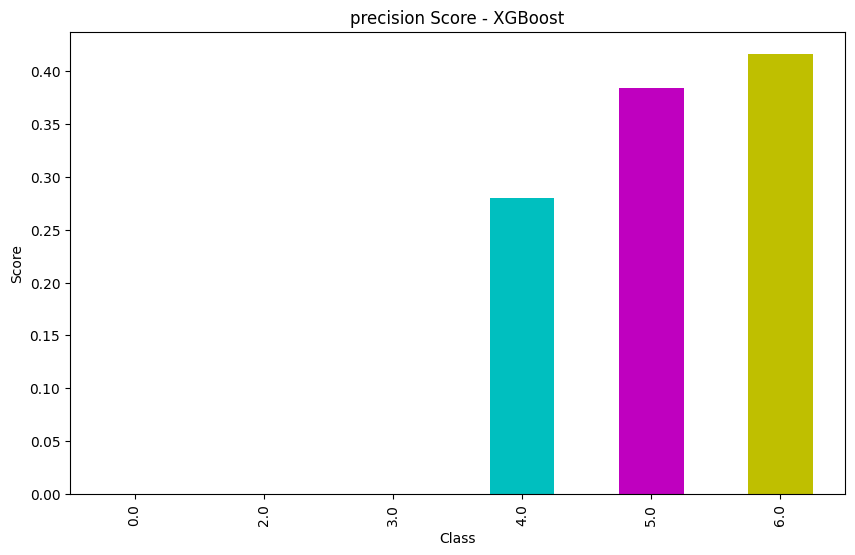

Accuracy: 0.39
Mean Squared Error (MSE): 1.44




In [ ]:
for target in new_target_columns:
    cut_dataset = dataset.copy()
    cut_dataset = cut_dataset.iloc[:, :37]
    cut_dataset[target] = dataset[target]
    run_evals(cut_dataset, target, models=new_best_models)